In [48]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import glob
import os

import plotly.offline as py
color = sns.color_palette()
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)
import plotly.tools as tls
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, roc_auc_score 
%matplotlib inline


In [116]:
g = glob.glob( 'eRo*')
g

['eRo111_SDSS_stars.gz_pkl',
 'eRo111_train_cv_0.gz_pkl',
 'eRo111_train_cv_1.gz_pkl']

In [120]:
df= pd.read_pickle('/home/nmalysheva/pred_for_fold/pred.gz_pkl', compression='gzip')
df

,nrow,ra,dec,sdssdr16_r_cmodel,sdssdr16_u_psf,sdssdr16_g_psf,sdssdr16_r_psf,sdssdr16_i_psf,sdssdr16_z_psf,sdssdr16_u_cmodel,...,STAR_decals8tr,QSO_decals8tr,GALAXY_decals8tr,STAR_sdssdr16+psdr2+wise_decals8tr,QSO_sdssdr16+psdr2+wise_decals8tr,GALAXY_sdssdr16+psdr2+wise_decals8tr,STAR_sdssdr16+psdr2+all_decals8tr,QSO_sdssdr16+psdr2+all_decals8tr,GALAXY_sdssdr16+psdr2+all_decals8tr,fold
0,765558,182.850396,48.979910,16.824337,21.455454,20.397562,20.176270,20.017108,19.522008,18.280063,...,0.157054,0.000919,0.842028,0.023671,0.001158,0.975171,0.013124,0.000286,0.986591,0
1,295976,192.616971,27.434890,13.692711,18.601305,16.781441,16.180791,15.854903,15.484326,16.269734,...,0.001000,0.000129,0.998870,0.000850,0.000273,0.998877,0.001288,0.000115,0.998597,0
5,267711,155.117013,37.951053,16.642016,19.744036,18.145850,17.332207,17.088476,16.753079,19.015308,...,0.012383,0.000148,0.987469,0.006323,0.002197,0.991480,0.002499,0.000277,0.997224,0
6,94182,185.510020,10.620819,15.300124,20.341056,19.010524,18.585923,17.817668,17.890224,17.053515,...,0.000610,0.000108,0.999282,0.002122,0.000523,0.997356,0.001930,0.000090,0.997980,0
11,476230,159.861973,5.562852,17.380912,19.755114,18.861927,18.829504,18.670477,18.471404,18.614930,...,0.392609,0.005122,0.602269,0.001984,0.000853,0.997164,0.001404,0.000614,0.997982,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94372,694127,4.709113,6.964043,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.385812,0.227300,0.386888,0.766296,0.201496,0.032208,0.862332,0.088569,0.049098,1
95296,695047,152.058440,40.935157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.385812,0.227300,0.386888,0.766296,0.201496,0.032208,0.862332,0.088569,0.049098,1
97481,697222,131.258890,41.010657,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.998621,0.000725,0.000654,0.991739,0.005533,0.002728,0.998363,0.000221,0.001417,1
98291,698028,154.661450,37.449325,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.997542,0.000546,0.001913,0.990555,0.006938,0.002506,0.998093,0.000395,0.001512,1


In [4]:
df_all = pd.read_pickle('../data/rename_x1_class.pkl_gz', compression='gzip')

In [50]:
!ls 

eRo111_SDSS_stars.gz_pkl  projects.zip
eRo111_train_cv_0.gz_pkl  subclass1_NadezdaMalysheva.csv
eRo111_train_cv_1.gz_pkl  subclassAll_NadezdaMalysheva.csv
projects		  Tikhon_s_readings.ipynb


In [51]:
spec_photo_all = pd.read_csv('subclassAll_NadezdaMalysheva.csv')

In [54]:
spec_photo_all

,subClass_all,ra,dec,objID
0,NaN,146.714210,-1.041304,1237648720142401611
1,STARFORMING,146.714210,-1.041304,1237648720142401611
2,NaN,146.919450,-0.990492,1237648720142532891
3,NaN,146.744130,-0.652191,1237650795146510627
4,BROADLINE,146.902290,-0.984913,1237648720142532813
...,...,...,...,...
5241914,K5,36.933789,1.161933,1237678437015158902
5241915,STARBURST,36.810348,1.093360,1237678437015093485
5241916,STARBURST,36.810348,1.093360,1237678437015093485
5241917,F2,36.784295,1.249465,1237678437015093324


In [43]:
spec_photo_all.loc[spec_photo_all['class']=='STAR']

,specObjID,objID,ra,dec,mjd,plate,z,zErr,class,subClass,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z,cModelMag_u,cModelMag_g,cModelMag_r,cModelMag_i,cModelMag_z
9,2.994933e+17,1237650795146576079,146.913750,-0.644481,51602,266,0.000661,0.000023,STAR,A0,19.40501,18.10427,18.09704,18.12775,18.21595,19.44499,18.06640,18.09170,18.14841,18.23063
10,2.994935e+17,1237650795146576079,146.913750,-0.644481,51630,266,0.000601,0.000020,STAR,A0,19.40501,18.10427,18.09704,18.12775,18.21595,19.44499,18.06640,18.09170,18.14841,18.23063
16,2.994954e+17,1237650795683643399,147.255340,-0.319337,51602,266,-0.000203,0.000017,STAR,WD,16.95076,16.51067,16.64215,16.81274,17.01157,16.94926,16.49637,16.64236,16.81133,17.01308
17,2.994965e+17,1237650795683643399,147.255340,-0.319337,51630,266,-0.000244,0.000018,STAR,WD,16.95076,16.51067,16.64215,16.81274,17.01157,16.94926,16.49637,16.64236,16.81133,17.01308
20,2.994979e+17,1237648721216274522,147.017920,-0.127266,51630,266,-0.000066,0.000050,STAR,WD,18.68811,18.27849,18.34214,18.47045,18.61139,18.67701,18.26507,18.34097,18.46107,18.55971
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1156672,4.617581e+17,1237678617437208652,44.287494,0.774469,51877,410,-0.000079,0.000022,STAR,WD,17.79134,17.40956,17.62480,17.82076,18.06170,17.78502,17.37901,17.61462,17.82017,18.04427
1156674,4.617584e+17,1237660241384898568,44.229919,0.431561,51877,410,-0.000125,0.000012,STAR,G0,17.97639,16.72646,16.29963,16.10923,16.05158,17.93092,16.71457,16.29188,16.11847,16.06230
1156681,4.617600e+17,1237660241384898568,44.229919,0.431561,51816,410,-0.000130,0.000010,STAR,F2,17.97639,16.72646,16.29963,16.10923,16.05158,17.93092,16.71457,16.29188,16.11847,16.06230
1156682,4.617600e+17,1237660241384833146,44.103077,0.599437,51877,410,-0.000502,0.000142,STAR,WD,17.74155,18.05068,18.50913,18.80193,19.06893,17.74239,18.04312,18.50378,18.81143,19.01261


In [45]:
spcs.shape, spec_photo_all.shape

((1103720, 20), (1156692, 20))

In [11]:
spcs = pd.read_csv('projects/input/SpecPhotoAll_star.csv')

In [20]:
spcs.loc[(spcs['ra'] < 202.28244) & (spcs['ra'] > 202.28242)]

,specObjID,objID,ra,dec,mjd,plate,z,zErr,class,subClass,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z,cModelMag_u,cModelMag_g,cModelMag_r,cModelMag_i,cModelMag_z
446706,3.380051e+18,1237658803116048441,202.28243,54.634649,54844,3002,0.00006,0.000009,STAR,K1,15.4263,13.44698,12.62724,12.3309,12.1902,15.37869,14.55365,14.28495,14.6658,12.17514


In [265]:
spcs[['objID', 'ra', 'dec', 'subClass']]

,objID,ra,dec,subClass
0,1237650795146576079,146.91375,-0.644481,A0
1,1237650795146576079,146.91375,-0.644481,A0
2,1237650795683643399,147.25534,-0.319337,WD
3,1237650795683643399,147.25534,-0.319337,WD
4,1237648721216340121,147.09176,-0.077346,WD
...,...,...,...,...
1103715,1237659120409182992,247.27702,34.238526,M5III (221615)
1103716,1237659153681481884,247.10825,33.580734,WDhotter
1103717,1237659119335637057,247.02664,33.509705,F2V (33256)
1103718,1237659153681481791,246.98904,33.602009,M5III (221615)


In [59]:
df.loc[df['subClass'] == 'C'].merge(spec_photo_all[['ra', 'dec', 'subClass_all']], left_on=['ra', 'dec'], right_on=['ra', 'dec'])

,nrow,ra,dec,sdssdr16_r_cmodel,sdssdr16_u_psf,sdssdr16_g_psf,sdssdr16_r_psf,sdssdr16_i_psf,sdssdr16_z_psf,sdssdr16_u_cmodel,...,__idx__,zspec,psfMag_i_y,gaiaedr3_parallax,gaiaedr3_parallax_error,gaiaedr3_pmra,gaiaedr3_pmra_error,gaiaedr3_pmdec,gaiaedr3_pmdec_error,subClass_all
0,764045,211.122350,17.399883,17.360589,17.113658,17.549543,17.363376,17.384377,17.259390,17.109599,...,NaN,NaN,NaN,1.934383,0.068671,-25.189290,0.071956,16.542097,0.059456,CV
1,917796,335.436620,18.668962,17.520908,17.570738,17.548667,17.518795,17.479381,17.261386,17.563649,...,NaN,NaN,NaN,5.268599,0.068219,-13.123737,0.047387,-4.779274,0.078499,CV
2,100647,239.184320,-0.163951,18.008162,18.153774,18.268360,18.006033,17.950172,17.530964,18.154531,...,NaN,NaN,NaN,3.411801,0.131087,-7.847617,0.113257,-2.302506,0.102749,CV
3,168056,237.655300,40.911099,18.312321,18.218628,18.553979,18.333253,18.251559,18.413565,18.199727,...,NaN,NaN,NaN,0.938070,0.103990,2.932688,0.099802,-7.591542,0.123157,CV
4,134421,173.064570,62.816786,18.355800,17.970318,18.388477,18.336526,18.170468,18.180270,17.982697,...,NaN,NaN,NaN,0.752412,0.159966,-10.948403,0.154810,-13.326915,0.133252,CV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,216731,4.737197,34.912294,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CV
122,391505,324.791900,73.134996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CV
123,101692,242.640150,-1.039792,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CV
124,104070,28.930807,0.468655,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CV


In [47]:
df.loc[df['subClass'] == 'C']

,nrow,ra,dec,sdssdr16_r_cmodel,sdssdr16_u_psf,sdssdr16_g_psf,sdssdr16_r_psf,sdssdr16_i_psf,sdssdr16_z_psf,sdssdr16_u_cmodel,...,__kfold_idx__,__idx__,zspec,psfMag_i_y,gaiaedr3_parallax,gaiaedr3_parallax_error,gaiaedr3_pmra,gaiaedr3_pmra_error,gaiaedr3_pmdec,gaiaedr3_pmdec_error
889,107225,262.534990,62.798503,14.240283,14.086632,14.067390,14.255243,14.390264,14.600585,14.041976,...,NaN,NaN,NaN,NaN,1.866945,0.030464,-4.660842,0.032721,-8.725794,0.034890
890,109256,125.650210,51.090158,15.194292,15.381988,15.353598,15.185674,15.199828,15.246343,15.376335,...,NaN,NaN,NaN,NaN,1.328636,0.032148,-9.476262,0.029616,-11.907166,0.025712
891,197870,192.078290,58.341376,15.306043,15.975110,15.613451,15.331271,15.098830,14.946695,15.954308,...,NaN,NaN,NaN,NaN,-0.031177,0.026941,-0.002182,0.027009,-0.013738,0.028342
892,249129,236.223370,25.896907,16.136077,16.440606,16.583033,16.124014,15.970886,15.642204,16.425290,...,NaN,NaN,NaN,NaN,2.023737,0.058997,12.420816,0.032583,-5.270897,0.057923
893,127696,249.020890,46.867920,16.827222,16.855944,16.694120,16.823890,16.932045,17.017105,16.837617,...,NaN,NaN,NaN,NaN,0.595539,0.041888,-9.614680,0.044697,1.712355,0.050504
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2480,319669,228.259570,23.252343,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2481,391505,324.791900,73.134996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2482,101692,242.640150,-1.039792,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2483,104070,28.930807,0.468655,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
pd.read_pickle(file, compression='gzip')

,nrow,objID,ra,dec,__nrow__,__kfold_idx__,__idx__,srcname,hpidx,RA_fin,DEC_fin,pos_r68,pos_r98,DET_LIKE_0,EXT_LIKE,flux_05-20,distance
0,408517,110210440676323111,44.067613,1.843846,286141,1,568475,SRGe J025616.9+015042,140387516,44.069668,1.845040,7.629857,14.137495,9.698636,0.0,1.318098e-14,8.550919
1,400440,110270440047315385,44.004779,1.895734,171455,1,340507,SRGe J025601.5+015347,141855687,44.005450,1.896520,3.917278,7.258392,56.131203,0.0,4.310830e-14,3.719638
2,181470,110260432005811662,43.200643,1.884355,260656,1,517717,SRGe J025247.8+015302,145939108,43.198683,1.883904,5.606528,10.388433,9.674092,0.0,1.289984e-14,7.232982
3,81601,110460434979061032,43.497936,2.050522,120371,1,238933,SRGe J025359.9+020301,149198005,43.498886,2.050277,5.495317,10.182369,12.075881,0.0,1.808160e-14,3.531980
4,526111,110570435039420811,43.503985,2.142008,200204,1,397712,SRGe J025401.3+020827,149409373,43.504704,2.140962,4.613927,8.549225,23.969151,0.0,2.200058e-14,4.570657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44360,470846,101853139366430975,313.936633,-5.124587,134687,1,267505,SRGe J205545.1-050734,824172296815,313.938098,-5.125869,9.471672,17.550226,6.157618,0.0,2.047435e-14,6.991555
44361,484676,101983106950888908,310.695124,-5.009573,4279,1,8569,SRGe J204247.3-050035,824246271332,310.697619,-5.009460,6.393811,11.847204,8.836473,0.0,2.576094e-14,8.957152
44362,430108,101733116317338743,311.631740,-5.218070,208684,1,414576,SRGe J204631.6-051307,824248204164,311.631959,-5.218277,5.739369,10.634577,11.935576,0.0,2.739914e-14,1.081033
44363,216070,101923097668871959,309.766895,-5.065388,82912,1,164647,SRGe J203904.2-050356,824267427479,309.767796,-5.065193,4.377687,8.111493,25.877386,0.0,5.196663e-14,3.305803


In [57]:
pd.read_pickle(file, compression='gzip').merge(spec_photo_all[['objID', 'ra', 'dec', 'subClass_all']], 
                                               left_on=['ra', 'dec'], right_on=['ra', 'dec'])

,nrow,objID_x,ra,dec,__nrow__,__kfold_idx__,__idx__,srcname,hpidx,RA_fin,DEC_fin,pos_r68,pos_r98,DET_LIKE_0,EXT_LIKE,flux_05-20,distance,objID_y,subClass_all


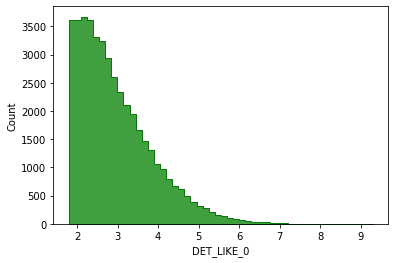

In [159]:
sns.histplot(np.log(pd.read_pickle(file, compression='gzip')['DET_LIKE_0']), bins = 50, color = 'g', element="step")

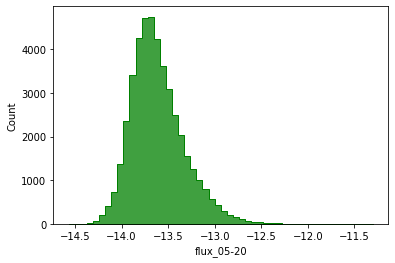

In [110]:
sns.histplot(np.log10(pd.read_pickle(file, compression='gzip')['flux_05-20']), bins = 50, color = 'g', element="step")

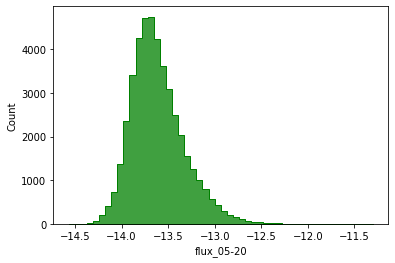

In [110]:
sns.histplot(np.log10(pd.read_pickle(file, compression='gzip')['flux_05-20']), bins = 50, color = 'g', element="step")

In [121]:
df0 ={}

In [ ]:
i = 0
file = g[i]
df0[i] = df.loc[df['class']==1].merge(pd.read_pickle(file, compression='gzip'), 
                                      left_on=['ra', 'dec'], right_on=['ra', 'dec'])
df0[i]['class'] = 1
df0[i]

In [ ]:
i = 1
file = g[i]
df0[i] = df.loc[(df['class']!=1)&(df['fold']==0)].merge(pd.read_pickle(file, compression='gzip'), left_on=['ra', 'nrow', 'dec'], right_on=['ra', 'nrow', 'dec'])
df0[i]

In [ ]:
i = 2
file = g[i]
df0[i] = df.loc[(df['class']!=1)&(df['fold']==1)].merge(pd.read_pickle(file, compression='gzip'), left_on=['ra', 'nrow', 'dec'], right_on=['ra','nrow', 'dec'])
df0[i]

In [ ]:
dff=pd.DataFrame([])
for i in range(3):
    dff = dff.append(df0[i])

In [27]:
df_all.loc[[:], ['nrow', 'ra', 'dec', 'zspec', 'zspec_conf', 'zoo_best-x1_z_max', 'zoo_best-x1_z_maxConf']]

,nrow,ra,dec,zspec,zspec_conf


In [ ]:
dff = dff.merge(df_all[['nrow', 'ra', 'dec', 'zspec', 
                                             'psfMag_i', 
                                             'zoo_best-x1_z_max', 
                                             'zoo_best-x1_z_maxConf',
                                             'gaiaedr3_parallax',
                                             'gaiaedr3_parallax_error',
                                             'gaiaedr3_pmra',
                                             'gaiaedr3_pmra_error',
                                             'gaiaedr3_pmdec',
                                             'gaiaedr3_pmdec_error']], left_on=['ra', 'nrow', 'dec'], right_on=['ra','nrow', 'dec'])

dff

In [ ]:
df = dff

In [ ]:
model = '_sdssdr16+psdr2+all_decals8tr'
classs = {1: 'STAR', 3: 'GALAXY', 2:'QSO'}

In [ ]:
threshold = 0.5
def recall(pred, threshold=0.5):
    a = 1 *(pred > threshold)
    assert len(a) > 0, 'Ampty array'
    return sum(a) / len(a)

def recall_add(pred, threshold=0.5):
    a = 1 *(np.max(pred, axis=1) > threshold)
    assert len(a) > 0, 'Ampty array'
    return sum(a) / len(a)

def not_true(pred, threshold=0.5):
    a = 1 *(pred < threshold)
    assert len(a) > 0, 'Ampty array'
    return sum(a) / len(a)

from sklearn.metrics import roc_curve, roc_auc_score

In [32]:
rec = {}#1
name = 'DET_LIKE_0'
columns = ['log_'+name, 'recall', 'roc-auc', 'count']
rec['STAR'] = pd.DataFrame([], columns=columns)
rec['GALAXY'] = pd.DataFrame([], columns=columns)
rec['QSO'] = pd.DataFrame([], columns=columns)
cl = 1
for cl in range(1,4):
    flax = [0, 3.0, 4.0, 10.0]
    for i in range(len(flax)-1):
        tmp0 = df.loc[(np.log(df[name]) > flax[i])&(np.log(df[name]) < flax[i+1])]
        tmp = tmp0.loc[tmp0['class'] == cl][classs[cl]+model]
        a = [str([flax[i], flax[i+1]]), 
             recall(tmp), 
             roc_auc_score(1*(tmp0['class']==cl), tmp0[classs[cl]+model]), 
             len(tmp)]
        rec[classs[cl]] = rec[classs[cl]].append(pd.DataFrame([a], columns=columns), ignore_index=True)
        
for i, r in rec.items():
    rec[i] = r.set_index(columns[0])
pd.concat(rec, axis=1).sort_index()

STAR                    GALAXY                       QSO  \
                  recall   roc-auc count    recall   roc-auc count    recall   
log_DET_LIKE_0                                                                 
[0, 3.0]        0.903665  0.987603  1910  0.965398  0.998448  1156  0.985702   
[3.0, 4.0]      0.815508  0.968033   374  0.940510  0.996670   353  0.986980   
[4.0, 10.0]     0.626335  0.960867   281  0.916427  0.993981   347  0.978439   

                                 
                 roc-auc  count  
log_DET_LIKE_0                   
[0, 3.0]        0.991933  51897  
[3.0, 4.0]      0.983750  22658  
[4.0, 10.0]     0.974393  11363

In [295]:
df.loc[(df['class'] != 1), ['psfMag_i']] = df.loc[(df['class'] != 1), ['psfMag_i_y']].values
df.loc[(df['class'] == 1), ['psfMag_i']] = df.loc[(df['class'] == 1), ['psfMag_i_x']].values
df

,nrow,ra,dec,sdssdr16_r_cmodel,sdssdr16_u_psf,sdssdr16_g_psf,sdssdr16_r_psf,sdssdr16_i_psf,sdssdr16_z_psf,sdssdr16_u_cmodel,...,psfMag_i_y,gaiaedr3_parallax,gaiaedr3_parallax_error,gaiaedr3_pmra,gaiaedr3_pmra_error,gaiaedr3_pmdec,gaiaedr3_pmdec_error,gaia_star,gaia_class,psfMag_i
0,479930,202.282430,54.634649,14.284850,15.425760,13.446979,12.627240,12.330905,12.189954,15.378677,...,NaN,0.564838,0.011014,-13.900929,0.010551,-12.078284,0.010929,1,1,12.33090
1,369864,39.590202,25.929937,14.326030,16.863442,15.115750,14.334579,14.009822,13.850344,16.856726,...,NaN,1.369119,0.022397,8.505642,0.027987,-7.697575,0.023248,1,1,14.01000
2,300688,9.479298,26.013941,14.439129,17.160359,15.317354,14.500675,14.171034,13.994981,17.174830,...,NaN,1.405428,0.049720,-4.538835,0.051475,3.369299,0.036127,1,1,14.17120
3,406634,123.857630,84.116610,14.449013,16.818112,15.170976,14.467044,14.189930,14.021493,16.823102,...,NaN,1.350881,0.016812,-2.315066,0.020782,-4.984065,0.020555,1,1,14.19016
4,884497,46.596422,-0.998363,14.468092,17.233317,15.308717,14.480649,14.098463,13.865375,17.216415,...,NaN,2.236993,0.020450,43.862877,0.024117,2.999362,0.023043,1,1,14.09860
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90336,379158,176.740791,40.619063,20.968640,23.128555,23.847986,20.960905,19.388747,19.257523,20.048764,...,19.41988,NaN,NaN,NaN,NaN,NaN,NaN,0,2,19.41988
90337,405,245.813667,47.099972,20.864200,23.196904,24.915909,20.873857,19.518247,19.236609,21.138404,...,19.53045,NaN,NaN,NaN,NaN,NaN,NaN,0,2,19.53045
90338,382,22.863917,-3.350053,20.100102,23.504853,24.186759,20.165938,18.466278,18.018938,23.073629,...,18.52333,NaN,NaN,NaN,NaN,NaN,NaN,0,2,18.52333
90339,309,136.628125,69.508556,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2,NaN


In [308]:
rec = {}#1
name = 'flux_05-20'
columns = ['data', 'recall', 'roc-auc', 'count']
rec['STAR'] = pd.DataFrame([], columns=columns)
rec['GALAXY'] = pd.DataFrame([], columns=columns)
rec['QSO'] = pd.DataFrame([], columns=columns)
cl = 1
for cl in range(1,4):
    flax = ['GAIA', 'psfMag_i<20', 'psfMag_i>20']
    
    tmp0 = df.loc[(df['psfMag_i'] < 20.)&(df['gaia_class'] > 0)]
    tmp = tmp0.loc[tmp0['gaia_class'] == cl][classs[cl]+model]
    a = [flax[0], 
         recall(tmp), 
         roc_auc_score(1*(tmp0['gaia_class']==cl), tmp0[classs[cl]+model]), 
         len(tmp)]
    rec[classs[cl]] = rec[classs[cl]].append(pd.DataFrame([a], columns=columns), ignore_index=True)
    
    tmp0 = df.loc[(df['psfMag_i'] < 20.)&(np.log10(df[name]) > -14.5)&(np.log10(df[name]) < -13.5)]
    tmp = tmp0.loc[tmp0['class'] == cl][classs[cl]+model]
    a = [flax[1], 
         recall(tmp), 
         roc_auc_score(1*(tmp0['class']==cl), tmp0[classs[cl]+model]), 
         len(tmp)]
    rec[classs[cl]] = rec[classs[cl]].append(pd.DataFrame([a], columns=columns), ignore_index=True)
    
    tmp0 = df.loc[(df['psfMag_i'] > 20.)&(np.log10(df[name]) > -14.5)&(np.log10(df[name]) < -13.5)]
    tmp = tmp0.loc[tmp0['class'] == cl][classs[cl]+model]
    a = [flax[2], 
         recall(tmp), 
         roc_auc_score(1*(tmp0['class']==cl), tmp0[classs[cl]+model]), 
         len(tmp)]
    rec[classs[cl]] = rec[classs[cl]].append(pd.DataFrame([a], columns=columns), ignore_index=True)
         
for i, r in rec.items():
    rec[i] = r.set_index(columns[0])
pd.concat(rec, axis=1).sort_index()

STAR                    GALAXY                       QSO  \
               recall   roc-auc count    recall   roc-auc count    recall   
data                                                                        
GAIA         0.941060  0.997909  1510  0.966207  0.998636  1450  0.988962   
psfMag_i<20  0.947887  0.994563  1420  0.983923  0.999579   933  0.991288   
psfMag_i>20  0.799669  0.971876   604  0.909938  0.994738   322  0.986218   

                              
              roc-auc  count  
data                          
GAIA         0.997642  46475  
psfMag_i<20  0.996719  27432  
psfMag_i>20  0.979840  33087

In [325]:
rec = {}#1
name = 'flux_05-20'
columns = ['data', 'recall', 'roc-auc', 'count']
rec['STAR'] = pd.DataFrame([], columns=columns)
rec['GALAXY'] = pd.DataFrame([], columns=columns)
rec['QSO'] = pd.DataFrame([], columns=columns)
cl = 1
for cl in range(1,4):
    flax = ['GAIA', 'psfMag_i<20', 'psfMag_i>20', 'ALL']
    
    tmp0 = df.loc[(df['psfMag_i'] < 20.)&(df['gaia_class'] > 0)]
    tmp = tmp0.loc[tmp0['gaia_class'] == cl][classs[cl]+model]
    a = [flax[0], 
         f'{recall(tmp):.3f}', 
         f"{roc_auc_score(1*(tmp0['class']==cl), tmp0[classs[cl]+model]):.3f}",  
         len(tmp)]
    rec[classs[cl]] = rec[classs[cl]].append(pd.DataFrame([a], columns=columns), ignore_index=True)
    
    tmp0 = df.loc[(df['psfMag_i'] < 20.)&(np.log10(df[name]) > -14.0)&(np.log10(df[name]) < -13.5)]
    tmp = tmp0.loc[tmp0['class'] == cl][classs[cl]+model]
    a = [flax[1], 
         f'{recall(tmp):.3f}', 
         f"{roc_auc_score(1*(tmp0['class']==cl), tmp0[classs[cl]+model]):.3f}",  
         len(tmp)]
    rec[classs[cl]] = rec[classs[cl]].append(pd.DataFrame([a], columns=columns), ignore_index=True)
    
    tmp0 = df.loc[(df['psfMag_i'] > 20.)&(np.log10(df[name]) > -14.0)&(np.log10(df[name]) < -13.5)]
    tmp = tmp0.loc[tmp0['class'] == cl][classs[cl]+model]
    a = [flax[2], 
         "{0:.3f}".format(recall(tmp)), 
         "{0:.3f}".format(roc_auc_score(1*(tmp0['class']==cl), tmp0[classs[cl]+model])), 
         len(tmp)]
    rec[classs[cl]] = rec[classs[cl]].append(pd.DataFrame([a], columns=columns), ignore_index=True)
    
    tmp0 = df.loc[(np.log10(df[name]) > -14.0)&(np.log10(df[name]) < -13.5)]
    tmp = tmp0.loc[tmp0['class'] == cl][classs[cl]+model]
    a = [flax[3], 
         f'{recall(tmp):.3f}', 
         f"{roc_auc_score(1*(tmp0['class']==cl), tmp0[classs[cl]+model]):.3f}", 
         len(tmp)]
    rec[classs[cl]] = rec[classs[cl]].append(pd.DataFrame([a], columns=columns), ignore_index=True)
         
for i, r in rec.items():
    rec[i] = r.set_index(columns[0])
pd.concat(rec, axis=1).sort_index()

STAR               GALAXY                  QSO               
            recall roc-auc count recall roc-auc count recall roc-auc  count
data                                                                       
ALL          0.903   0.988  1752  0.965   0.998  1114  0.986   0.992  56180
GAIA         0.941   0.998  1510  0.966   0.999  1450  0.989   0.998  46475
psfMag_i<20  0.945   0.995  1226  0.984   1.000   828  0.992   0.997  25980
psfMag_i>20  0.804   0.970   526  0.909   0.994   286  0.986   0.979  30027

In [307]:
rec = {}#1
name = 'flux_05-20'
columns = ['data', 'recall', 'roc-auc', 'count']
rec['STAR'] = pd.DataFrame([], columns=columns)
rec['GALAXY'] = pd.DataFrame([], columns=columns)
rec['QSO'] = pd.DataFrame([], columns=columns)
cl = 1
for cl in range(1,4):
    flax = ['GAIA', 'psfMag_i<20', 'psfMag_i>20']
    
    tmp0 = df.loc[(df['psfMag_i'] < 20.)&(df['gaia_class'] > 0)]
    tmp = tmp0.loc[tmp0['gaia_class'] == cl][classs[cl]+model]
    a = [flax[0], 
         recall(tmp), 
         roc_auc_score(1*(tmp0['gaia_class']==cl), tmp0[classs[cl]+model]), 
         len(tmp)]
    rec[classs[cl]] = rec[classs[cl]].append(pd.DataFrame([a], columns=columns), ignore_index=True)
    
    tmp0 = df.loc[(df['psfMag_i'] < 20.)&(np.log10(df[name]) > -14.0)&(np.log10(df[name]) < -13.0)]
    tmp = tmp0.loc[tmp0['class'] == cl][classs[cl]+model]
    a = [flax[1], 
         recall(tmp), 
         roc_auc_score(1*(tmp0['class']==cl), tmp0[classs[cl]+model]), 
         len(tmp)]
    rec[classs[cl]] = rec[classs[cl]].append(pd.DataFrame([a], columns=columns), ignore_index=True)
    
    tmp0 = df.loc[(df['psfMag_i'] > 20.)&(np.log10(df[name]) > -14.0)&(np.log10(df[name]) < -13.0)]
    tmp = tmp0.loc[tmp0['class'] == cl][classs[cl]+model]
    a = [flax[2], 
         recall(tmp), 
         roc_auc_score(1*(tmp0['class']==cl), tmp0[classs[cl]+model]), 
         len(tmp)]
    rec[classs[cl]] = rec[classs[cl]].append(pd.DataFrame([a], columns=columns), ignore_index=True)
         
for i, r in rec.items():
    rec[i] = r.set_index(columns[0])
pd.concat(rec, axis=1).sort_index()

STAR                    GALAXY                       QSO  \
               recall   roc-auc count    recall   roc-auc count    recall   
data                                                                        
GAIA         0.941060  0.997909  1510  0.966207  0.998636  1450  0.988962   
psfMag_i<20  0.907886  0.987936  1509  0.969125  0.999027  1166  0.990245   
psfMag_i>20  0.789389  0.968244   622  0.892958  0.992602   355  0.985528   

                              
              roc-auc  count  
data                          
GAIA         0.997642  46475  
psfMag_i<20  0.993166  42541  
psfMag_i>20  0.977676  35931

In [252]:
rec = {}#5
name = 'DET_LIKE_0'
columns = ['log_'+name, 'recall', 'count']
for sub in sub_class:
    rec[sub] = pd.DataFrame([], columns=columns)
    flax = [0, 3.0, 4.0, 10.0]
    cl=1
    for i in range(len(flax)-1):
        tmp = df.loc[(df['class'] == cl)&(df['subClass'] == sub)&(np.log(df[name]) > flax[i])&(np.log(df[name]) < flax[i+1])][classs[cl]+model]
        a = [str([flax[i], flax[i+1]]), recall(tmp), len(tmp)]
        rec[sub] = rec[sub].append(pd.DataFrame([a], columns=columns), ignore_index=True)
        
for i, r in rec.items():
    rec[i] = r.set_index(columns[0])
sub_res = pd.concat(rec, axis=1).sort_index()
sub_res

K              OB               M               A  \
                  recall count    recall count    recall count    recall   
log_DET_LIKE_0                                                             
[0, 3.0]        0.942308   312  0.714286    28  0.942272   537  0.904762   
[3.0, 4.0]      0.957746    71  0.571429     7  0.920000   125  0.750000   
[4.0, 10.0]     0.790698    43  0.181818    11  0.818182    55  0.500000   

                             G               F               C        \
               count    recall count    recall count    recall count   
log_DET_LIKE_0                                                         
[0, 3.0]         105  0.854545   165  0.957265   585  0.533333    75   
[3.0, 4.0]        20  0.769231    26  0.900000    60  0.575000    40   
[4.0, 10.0]        8  0.714286    14  0.848485    33  0.543478    92   

                      LT              WD        
                  recall count    recall count  
log_DET_LIKE_0                                  
[0, 3.0]        0.343750    32  0.830986    71  
[3.0, 4.0]      0.000000    16  0.666667     9  
[4.0, 10.0]     0.052632    19  0.333333     6

In [255]:
rec = {}#5
name = 'flux_05-20'
columns = ['log_'+name, 'recall', 'count']
for sub in sub_class:
    rec[sub] = pd.DataFrame([], columns=columns)
    flax = [-np.inf, -14.0, -13.5, -11.0]
    cl=1
    for i in range(len(flax)-1):
        tmp = df.loc[(df['class'] == cl)&(df['subClass'] == sub)&(np.log10(df[name]) > flax[i])&(np.log10(df[name]) < flax[i+1])][classs[cl]+model]
        a = [str([flax[i], flax[i+1]]), recall(tmp), len(tmp)]
        rec[sub] = rec[sub].append(pd.DataFrame([a], columns=columns), ignore_index=True)
        
for i, r in rec.items():
    rec[i] = r.set_index(columns[0])
sub_res = pd.concat(rec, axis=1).sort_index()
sub_res

K              OB               M               A  \
                  recall count    recall count    recall count    recall   
log_flux_05-20                                                             
[-13.5, -11.0]  0.830986    71  0.294118    17  0.875000   128  0.681818   
[-14.0, -13.5]  0.941558   308  0.739130    23  0.941860   516  0.881720   
[-inf, -14.0]   1.000000    47  0.800000     5  0.931507    73  0.944444   

                             G               F               C        \
               count    recall count    recall count    recall count   
log_flux_05-20                                                         
[-13.5, -11.0]    22  0.722222    36  0.875000    80  0.539062   128   
[-14.0, -13.5]    93  0.848276   145  0.964072   501  0.560000    75   
[-inf, -14.0]     18  0.916667    24  0.917526    97  0.500000     4   

                      LT              WD        
                  recall count    recall count  
log_flux_05-20                                  
[-13.5, -11.0]  0.062500    32  0.600000    15  
[-14.0, -13.5]  0.241379    29  0.838710    62  
[-inf, -14.0]   0.500000     6  0.666667     9

In [264]:
rec = {}
columns = ['data', 'recall', 'count']
rec['STAR'] = pd.DataFrame([], columns=columns)
rec['GALAXY'] = pd.DataFrame([], columns=columns)
rec['QSO'] = pd.DataFrame([], columns=columns)

cl = 1
for cl in range(1,4):
    flax = ['GAIA', '>20', '<20']
    
    tmp = df.loc[(df['gaia_class'] == cl)&(np.log10(df['flux_05-20']) > -14.5)&(np.log10(df['flux_05-20']) < flax[i+1])][classs[cl]+model]
    a = [str([flax[i], flax[i+1]]), recall(tmp), len(tmp)]
    rec[classs[cl]] = rec[classs[cl]].append(pd.DataFrame([a], columns=columns), ignore_index=True)

    flax = [-14.0, np.inf]
    for i in range(len(flax)-1):
        tmp = df.loc[(df['class'] == cl)&(np.log10(df['flux_05-20']) > flax[i])&(np.log10(df['flux_05-20']) < flax[i+1])][classs[cl]+model]
        a = [str([flax[i], flax[i+1]]), recall(tmp), len(tmp)]
        rec[classs[cl]] = rec[classs[cl]].append(pd.DataFrame([a], columns=columns), ignore_index=True)
        
for i, r in rec.items():
    rec[i] = r.set_index(columns[0])
pd.concat(rec, axis=1).sort_index()

STAR          GALAXY             QSO       
                  recall count    recall count    recall  count
log_10_flax                                                    
[-13.5, -11.0]  0.693762   529  0.923333   600  0.982107  25206
[-14.0, -13.5]  0.902968  1752  0.964991  1114  0.986472  56180
[-14.0, inf]    0.853327  2284  0.950408  1714  0.985120  81386
[-14.5, -14.0]  0.908088   272  0.964539   141  0.984330   4531

In [136]:
np.sum(df['class'] == 3)

1856

In [219]:
def recall(pred):
    a = 1 *(pred > 0.5)
    if len(a) > 0:
        return sum(a) / len(a)
    else:
        return None

def recall_add(pred):
    a = 1 *(np.max(pred, axis=1) > 0.5)
    assert len(a) > 0, 'Ampty array'
    return sum(a) / len(a)

def not_true(pred):
    a = 1 *(pred < 0.5)
    assert len(a) > 0, 'Ampty array'
    return sum(a) / len(a)

In [79]:
i = 1
recall(df.loc[(df['class'] == i)][classs[1]+model]), recall(df.loc[(df['class'] == i)][classs[2]+model]), recall(df.loc[(df['class'] == i)][classs[3]+model]) 

(0.859758472925594, 0.10634982469809116, 0.027269185820023373)

In [80]:
i = 2
recall(df.loc[(df['class'] == i)][classs[1]+model]), recall(df.loc[(df['class'] == i)][classs[2]+model]), recall(df.loc[(df['class'] == i)][classs[3]+model]) 

(0.007949440163877185, 0.9850787960613608, 0.006215228473660932)

In [81]:
i = 3
recall(df.loc[(df['class'] == i)][classs[1]+model]), recall(df.loc[(df['class'] == i)][classs[2]+model]), recall(df.loc[(df['class'] == i)][classs[3]+model]) 

(0.010237068965517241, 0.03556034482758621, 0.9515086206896551)

In [72]:
recall_add(df.loc[(df['class'] != 1)][[classs[2]+model, classs[3]+model]])

0.9912046847585846

# Что происходит в звездах?

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

['K' 'OB' 'M' 'A' 'G' 'F' 'C' 'LT' 'WD'] [379, 41, 644, 115, 182, 581, 203, 62, 77]


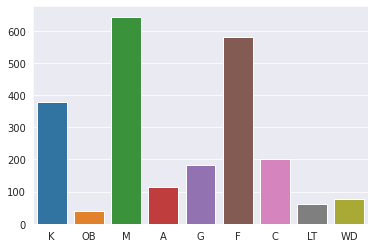

In [194]:
df_star = df.loc[(df['class'] == 1)&(np.log10(df['flux_05-20']) > -14.0)]
sub_class = df_star['subClass'].unique()
x0 = sub_class
y0 = [len(df_star.loc[df_star['subClass'] == i]) for i in x0]
print(x0, y0)

sns.barplot(x=x0, y=y0);

In [195]:
add = pd.DataFrame([[368391, 93824, 34510, 181441, 153895, 95473, 13739, 8008, 14470]], columns=['F', 'G', 'WD', 'M', 'K', 'A', 'OB', 'LT', 'C'])

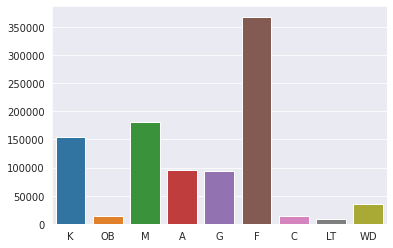

In [196]:
sns.barplot(x=sub_class, y=[add[i].values[0] for i in sub_class]);

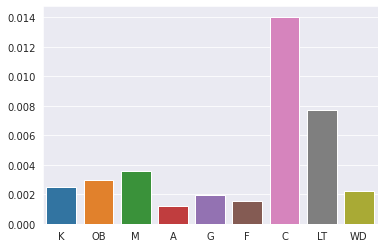

In [197]:
sns.barplot(x=sub_class, y=y0 / np.array([add[i].values[0] for i in sub_class]));

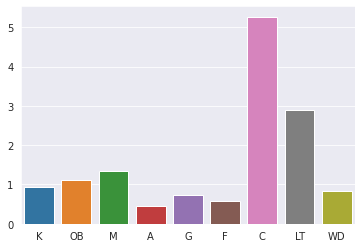

In [198]:
sns.barplot(x=x0, y=(y0 / np.array([add[i].values[0] for i in x0])*(963751/2567)));

In [246]:
2567/963751

0.0026635510624632296

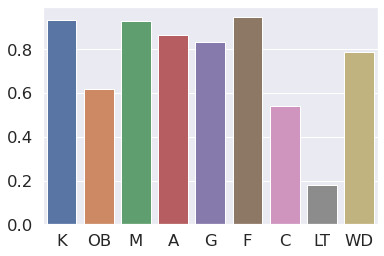

In [242]:
sns.barplot(x=x, y=[sub_res[(i, 'recall')]['[0, 3.0]'] for i in x]);

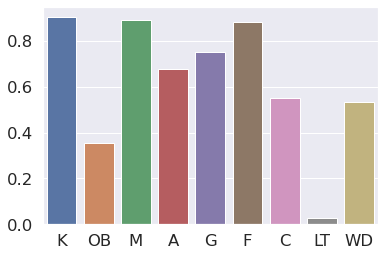

In [243]:
sns.barplot(x=x, y=[sub_res[(i, 'recall')]['[3.0, 4.0]'] for i in x]);

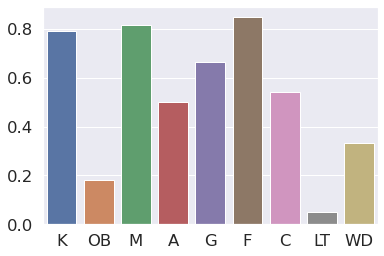

In [244]:
sns.barplot(x=x, y=[sub_res[(i, 'recall')]['[4.0, 10.0]'] for i in x]);

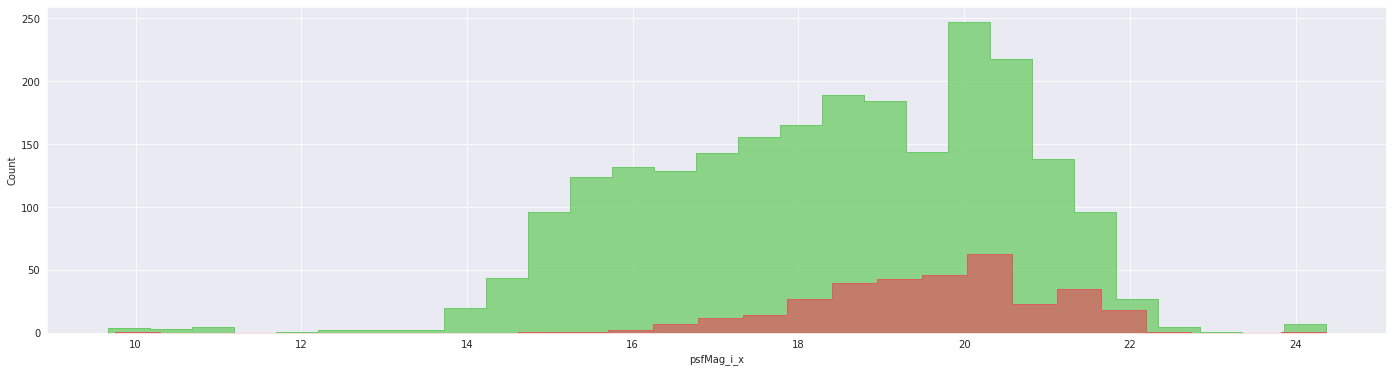

In [200]:
fig, (ax1) = plt.subplots(ncols = 1, figsize = (24, 6))
sns.histplot(df_star['psfMag_i_x'], ax=ax1, color = 'g', element="step")
sns.histplot(df_star.loc[df_star['STAR_sdssdr16+psdr2+all_decals8tr'] < 0.5]['psfMag_i_x'], ax=ax1, color = 'r', element="step")

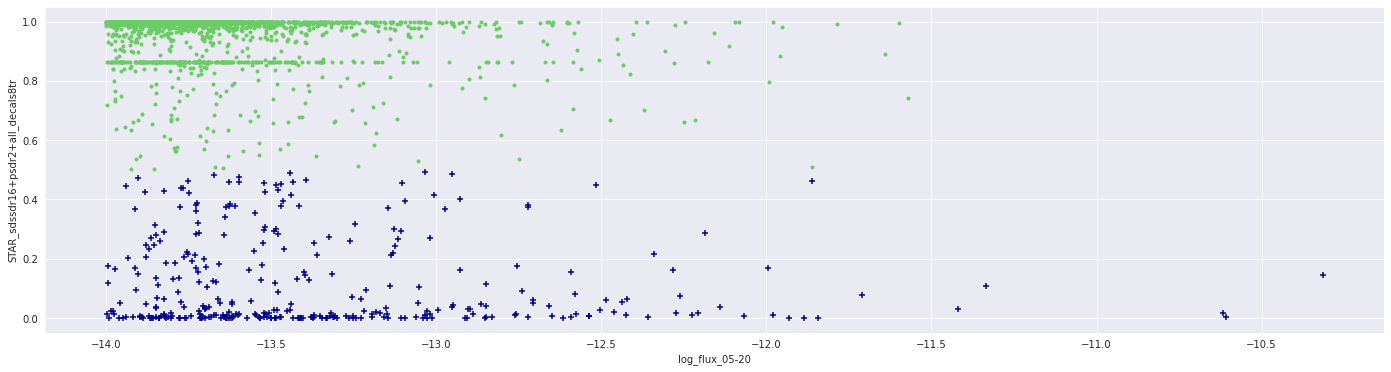

In [201]:
fig, (ax1) = plt.subplots(ncols = 1, figsize = (24, 6))
p = df_star.loc[(df_star['STAR_sdssdr16+psdr2+all_decals8tr'] > 0.5)]
x = 'log_flux_05-20'
y = 'STAR_sdssdr16+psdr2+all_decals8tr'#'psfMag_i'
plt.xlabel(x)
plt.ylabel(y)
ax1.scatter(np.log10(p['flux_05-20']),p[y], c = 'g', marker = '.')
p = df_star.loc[(df_star['STAR_sdssdr16+psdr2+all_decals8tr'] < 0.5)]
ax1.scatter(np.log10(p['flux_05-20']),p[y], c = 'darkblue', marker = '+')

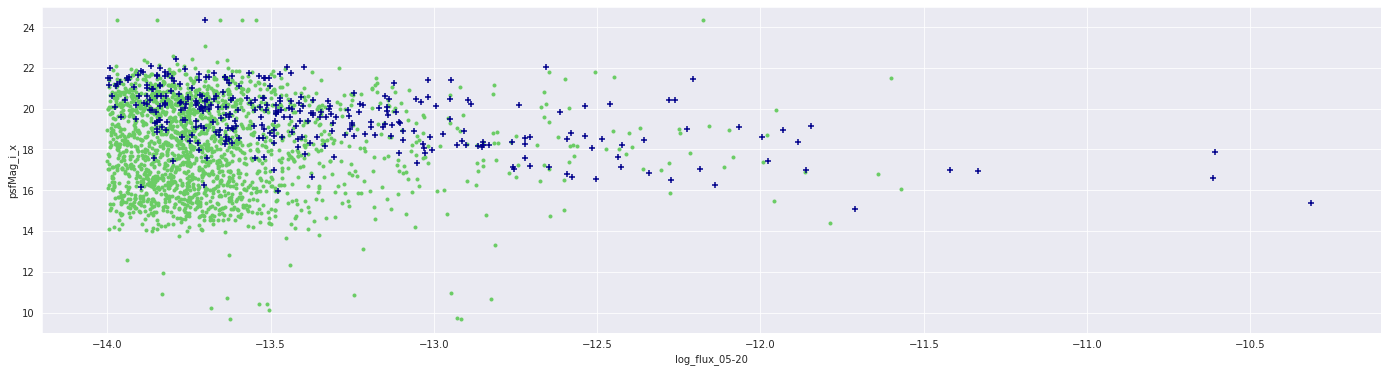

In [232]:
cls = 1
cls_name = 'STAR'
fig, (ax1) = plt.subplots(ncols = 1, figsize = (24, 6))
p = df_star.loc[((df_star['STAR'+model] > df_star['QSO'+model]) &  (df_star['STAR'+model] > df_star['GALAXY'+model]))]
x = 'log_flux_05-20'
y = 'psfMag_i_x'
plt.xlabel(x)
plt.ylabel(y)
plt.xlim([-14.2, -10.1])
plt.ylim([9, 25])
#plt.grid()
ax1.scatter(np.log10(p['flux_05-20']),p[y], c = 'g', marker = '.')
p = df_star.loc[((df_star['STAR'+model] < df_star['QSO'+model]) |  (df_star['STAR'+model] < df_star['GALAXY'+model]))]
ax1.scatter(np.log10(p['flux_05-20']),p[y], c = 'darkblue', marker = '+')

In [228]:
df_star.loc[(df_star[cls_name+model] < 0.5) & (np.log10(df_star['flux_05-20']) > -12.0)].to_pickle('../../../bad_star.gz_pkl', compression='gzip')

In [230]:
df_star.loc[((df_star['STAR'+model] < df_star['QSO'+model]) |  (df_star['STAR'+model] < df_star['GALAXY'+model])) & (np.log10(df_star['flux_05-20']) > -12.0)][['STAR'+model, 'QSO'+model, 'GALAXY'+model]]

,STAR_sdssdr16+psdr2+all_decals8tr,QSO_sdssdr16+psdr2+all_decals8tr,GALAXY_sdssdr16+psdr2+all_decals8tr
84,0.030521,0.936370,0.033109
174,0.017634,0.974995,0.007371
180,0.000964,0.998567,0.000469
520,0.144532,0.845595,0.009873
891,0.077849,0.917746,0.004404
894,0.463404,0.532706,0.003890
1311,0.000880,0.998834,0.000287
1391,0.109239,0.849810,0.040951
2384,0.011335,0.988330,0.000334
2412,0.170208,0.583560,0.246233


0 K [0, 0]
1 OB [0, 1]
2 M [0, 2]
3 A [1, 0]
4 G [1, 1]
5 F [1, 2]
6 C [2, 0]
7 LT [2, 1]
8 WD [2, 2]


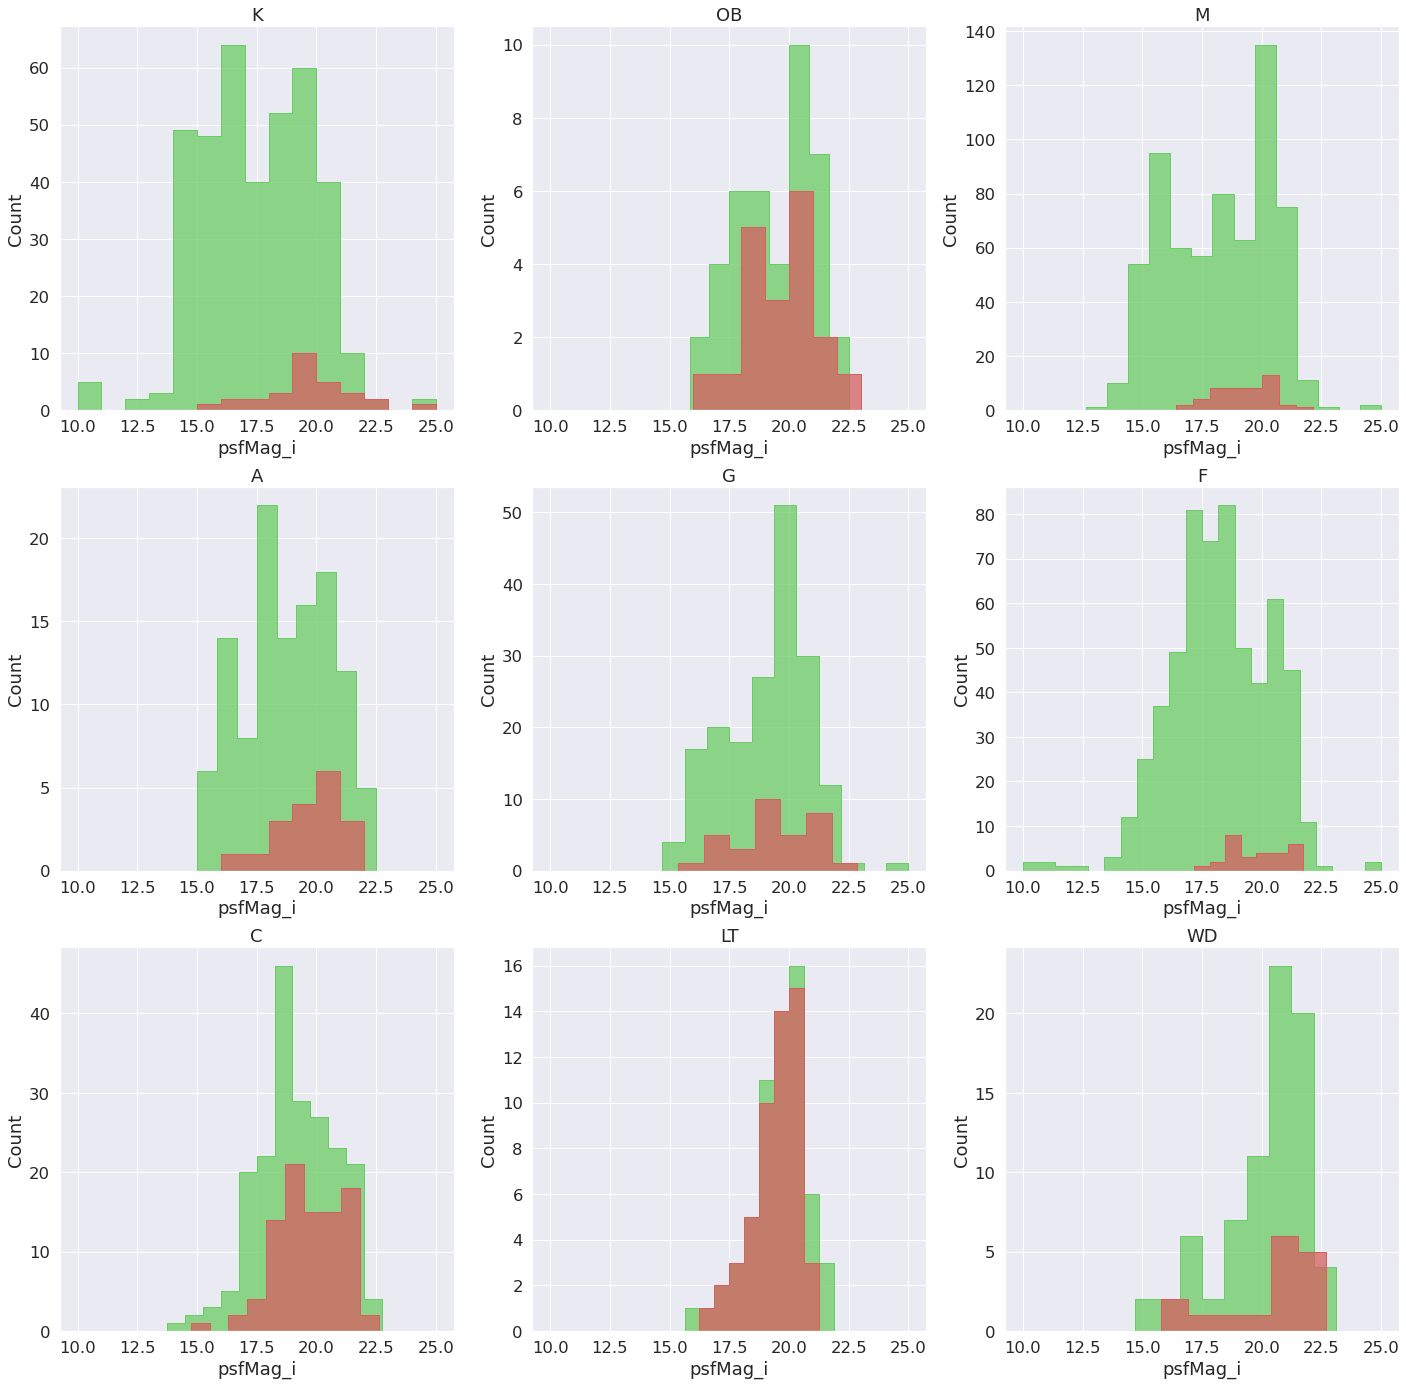

In [385]:
fig, ax = plt.subplots(nrows = 3, ncols=3, figsize = (24, 24))

for en, i in enumerate(sub_class):
    j = [en//3, en%3]
    ax[j[0]][j[1]].set_title(i)
    sns.histplot(df_star.loc[(df_star['subClass'] == i)]['psfMag_i'], ax=ax[j[0]][j[1]], color = 'g', element="step", binrange=(10, 25))
    sns.histplot(df_star.loc[(df_star['subClass'] == i)&(df_star['STAR_sdssdr16+psdr2+all_decals8tr'] < 0.5)]['psfMag_i'], ax=ax[j[0]][j[1]], color = 'r', element="step", binrange=(10, 25))

In [342]:
df_star_gaia=df_star.merge(star_agr[[   'nrow',
                                        'ra',
                                        'dec',
                                        'gaiaedr3_parallax',
                                        'gaiaedr3_parallax_error',
                                        'gaiaedr3_pmra',
                                        'gaiaedr3_pmra_error',
                                        'gaiaedr3_pmdec',
                                        'gaiaedr3_pmdec_error',
                                        'gaiaedr3_pseudocolour', 
                                        'gaiaedr3_pseudocolour_error',
                                        'gaiaedr3_dr2_radial_velocity',
                                        'gaiaedr3_dr2_radial_velocity_error']].drop_duplicates(), on=['nrow', 'ra', 'dec'])

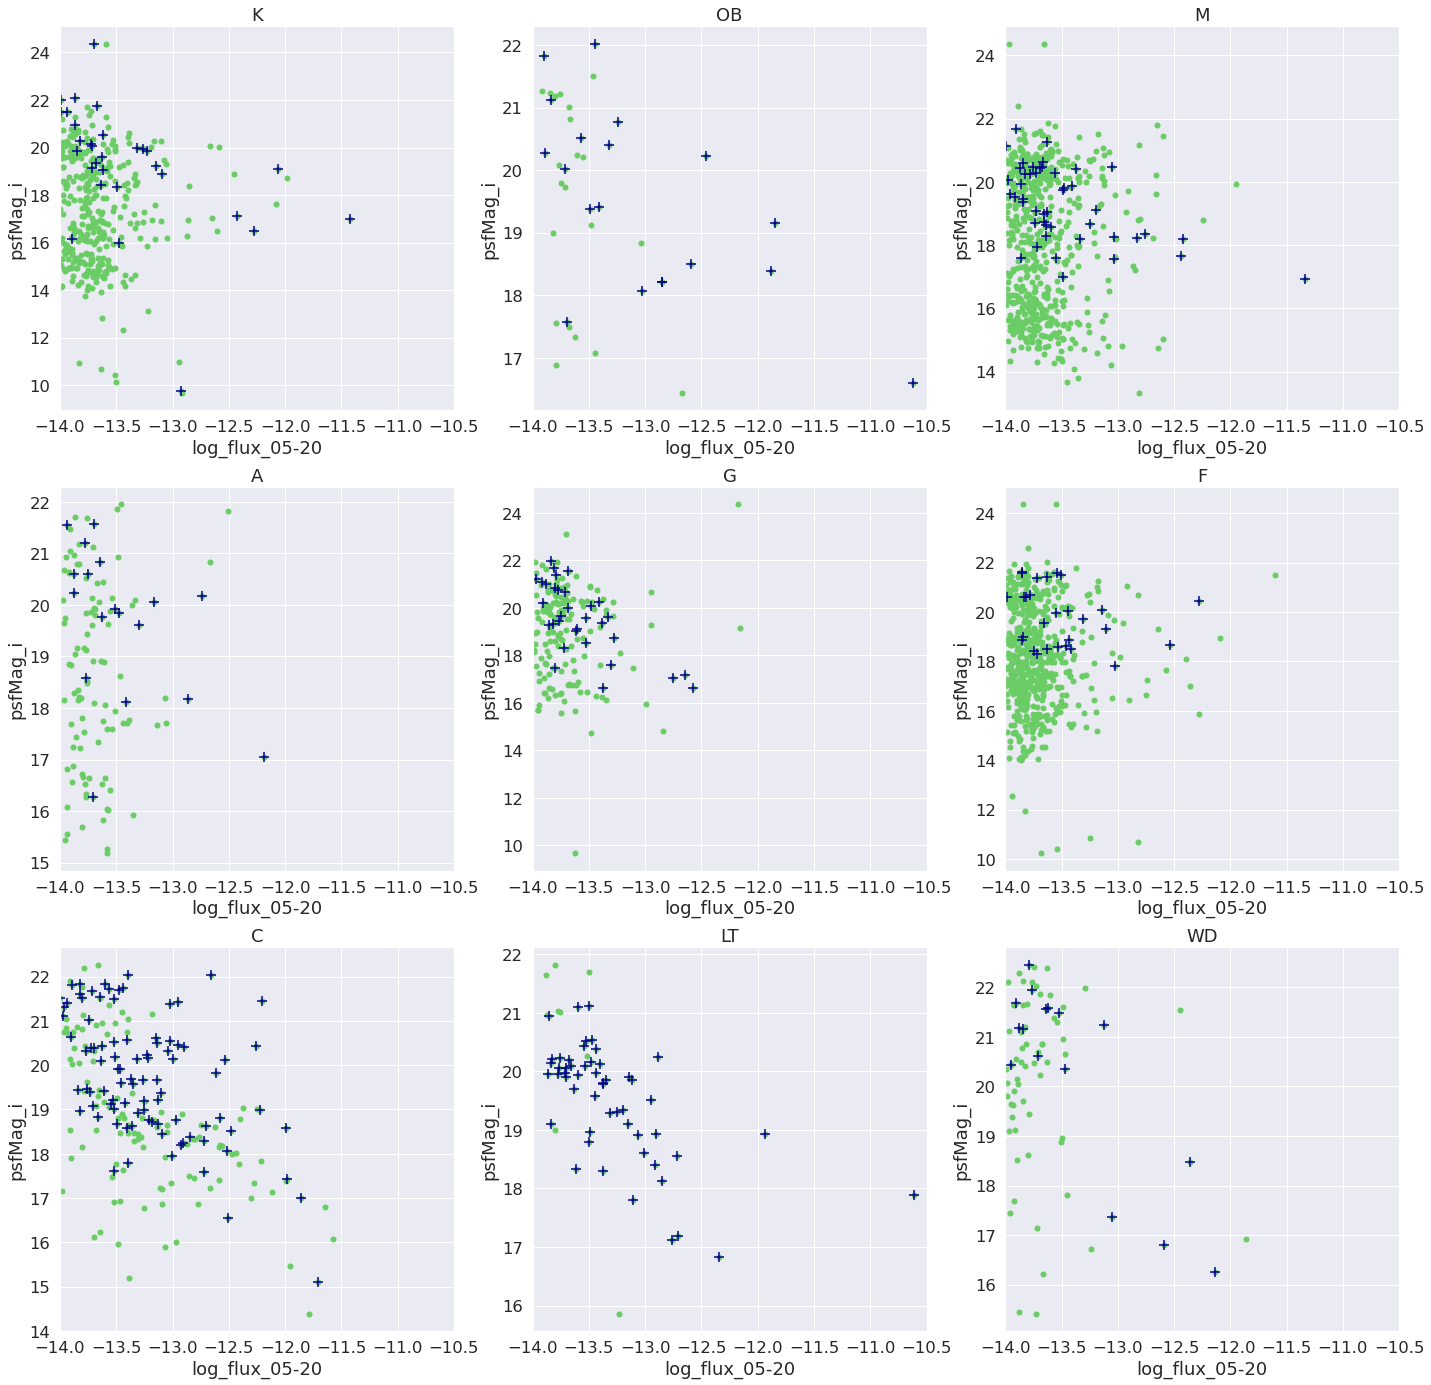

In [387]:
fig, ax = plt.subplots(nrows = 3, ncols=3, figsize = (24, 24))
x = 'log_flux_05-20'
y = 'psfMag_i'
for en, i in enumerate(sub_class):
    j = [en//3, en%3]
    ax[j[0]][j[1]].set_title(i)
    ax[j[0]][j[1]].set_xlabel(x)
    ax[j[0]][j[1]].set_ylabel(y)
    ax[j[0]][j[1]].set_xlim([-14.0, -10.5])
    p = df_star.loc[(df_star['subClass'] == i)]
    ax[j[0]][j[1]].scatter(np.log10(p['flux_05-20']),p[y], c = 'g', marker = '.', s=100)
    ax[j[0]][j[1]].scatter(np.log10(p.loc[p['STAR_sdssdr16+psdr2+all_decals8tr'] < 0.5]['flux_05-20']),p.loc[p['STAR_sdssdr16+psdr2+all_decals8tr'] < 0.5][y], c = 'r', marker = '+', s=100)


In [331]:
star_agr = pd.read_pickle('../../OB-S(non-OB)-G-Q_PanSTARRS+GAIA/data/star_agr.pkl_gz', compression='gzip')

In [332]:
star_agr

,objID,nrow,subClass,ra,dec,skycoord.ra,skycoord.dec,__workxid__,ls_sep_input,ls_release,...,ps_zPSFMag--ps_yPSFMag,ps_zPSFMag--gaiaedr3_phot_g_mean_Mag,ps_zPSFMag--gaiaedr3_phot_bp_mean_Mag,ps_zPSFMag--gaiaedr3_phot_rp_mean_Mag,ps_yPSFMag--gaiaedr3_phot_g_mean_Mag,ps_yPSFMag--gaiaedr3_phot_bp_mean_Mag,ps_yPSFMag--gaiaedr3_phot_rp_mean_Mag,gaiaedr3_phot_g_mean_Mag--gaiaedr3_phot_bp_mean_Mag,gaiaedr3_phot_g_mean_Mag--gaiaedr3_phot_rp_mean_Mag,gaiaedr3_phot_bp_mean_Mag--gaiaedr3_phot_rp_mean_Mag
0,1237680099697950809,1,b'F',18.058003,1.986839,18.058003,1.986839,0,0.035265,8000.0,...,0.081772,16.623936,15.917804,16.158726,16.542164,15.836032,16.076954,-0.706132,-0.465210,0.240922
1,1237680099160883598,2,b'G',17.736421,1.588139,17.736421,1.588139,1,0.049755,8000.0,...,0.190266,16.585507,15.554657,16.147873,16.395242,15.364392,15.957607,-1.030850,-0.437634,0.593216
2,1237678617962479968,3,b'WD',17.710198,1.733299,17.710198,1.733299,2,0.108188,8000.0,...,-0.041251,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1237668504368709939,4,b'M',252.531370,50.930671,252.531370,50.930671,3,0.022621,8001.0,...,-0.013007,16.717058,16.167746,16.293842,16.730065,16.180753,16.306849,-0.549312,-0.423215,0.126097
4,1237668504368644780,5,b'F',252.390550,51.200966,252.390550,51.200966,4,0.089921,8001.0,...,0.255585,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60414,1237668503831839169,960359,b'WD',252.083230,50.783279,252.083230,50.783279,60358,0.109451,8001.0,...,0.420864,16.976016,16.796658,15.959974,16.555152,16.375794,15.539110,-0.179358,-1.016042,-0.836684
60415,1237665583790752642,960360,b'F',252.201060,50.891273,252.201060,50.891273,60359,0.105392,8001.0,...,0.214927,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60416,1237665584327361688,960361,b'M',252.358160,51.708907,252.358160,51.708907,60360,0.562651,8001.0,...,0.417521,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60417,1237665584327164382,960362,b'F',252.128200,52.155919,252.128200,52.155919,60361,0.065186,8001.0,...,0.083584,16.829432,16.276171,16.366992,16.745849,16.192588,16.283408,-0.553261,-0.462440,0.090821


In [334]:
star_agr.loc[star_agr['nrow']==479930]

,objID,nrow,subClass,ra,dec,skycoord.ra,skycoord.dec,__workxid__,ls_sep_input,ls_release,...,ps_zPSFMag--ps_yPSFMag,ps_zPSFMag--gaiaedr3_phot_g_mean_Mag,ps_zPSFMag--gaiaedr3_phot_bp_mean_Mag,ps_zPSFMag--gaiaedr3_phot_rp_mean_Mag,ps_yPSFMag--gaiaedr3_phot_g_mean_Mag,ps_yPSFMag--gaiaedr3_phot_bp_mean_Mag,ps_yPSFMag--gaiaedr3_phot_rp_mean_Mag,gaiaedr3_phot_g_mean_Mag--gaiaedr3_phot_bp_mean_Mag,gaiaedr3_phot_g_mean_Mag--gaiaedr3_phot_rp_mean_Mag,gaiaedr3_phot_bp_mean_Mag--gaiaedr3_phot_rp_mean_Mag
80099,1237658803116048441,479930,b'K',202.28243,54.634649,202.28243,54.634649,79929,0.246357,8001.0,...,0.507408,16.882713,16.02412,16.613873,16.375305,15.516711,16.106465,-0.858594,-0.26884,0.589754


In [340]:
df_star

,nrow,ra,dec,sdssdr16_r_cmodel,sdssdr16_u_psf,sdssdr16_g_psf,sdssdr16_r_psf,sdssdr16_i_psf,sdssdr16_z_psf,sdssdr16_u_cmodel,...,pos_r68,pos_r98,DET_LIKE_0,EXT_LIKE,flux_05-20,distance,class,__nrow__,__kfold_idx__,__idx__
0,479930,202.282430,54.634649,14.284850,15.425760,13.446979,12.627240,12.330905,12.189954,15.378677,...,4.174729,7.735428,25.135826,0.0,3.630290e-14,2.296179,1,NaN,NaN,NaN
2,300688,9.479298,26.013941,14.439129,17.160359,15.317354,14.500675,14.171034,13.994981,17.174830,...,6.113890,11.328534,6.878374,0.0,1.051401e-14,9.153028,1,NaN,NaN,NaN
3,406634,123.857630,84.116610,14.449013,16.818112,15.170976,14.467044,14.189930,14.021493,16.823102,...,5.038214,9.335395,15.196437,0.0,1.774412e-14,4.537424,1,NaN,NaN,NaN
4,884497,46.596422,-0.998363,14.468092,17.233317,15.308717,14.480649,14.098463,13.865375,17.216415,...,4.399530,8.151965,21.908596,0.0,1.933372e-14,0.568464,1,NaN,NaN,NaN
6,280116,19.525657,31.106684,14.843651,17.287638,15.562327,14.861379,14.604046,14.439733,17.291344,...,6.317453,11.705719,8.877472,0.0,1.308811e-14,5.355426,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2560,855992,221.206600,50.519672,21.938967,22.839024,21.976573,22.084680,22.094075,22.376024,21.419480,...,7.029664,13.025387,8.722369,0.0,1.065134e-14,8.844134,1,NaN,NaN,NaN
2563,806834,233.906570,43.701094,22.245507,23.532489,21.836118,22.079590,22.125115,21.398329,22.202184,...,11.376208,21.079174,14.741174,0.0,1.445053e-14,18.606929,1,NaN,NaN,NaN
2564,946607,333.644180,30.955404,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.020128,11.154799,6.623434,0.0,1.320050e-14,7.986116,1,NaN,NaN,NaN
2565,213536,166.997760,40.986351,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.412385,11.881620,9.204184,0.0,1.910367e-14,2.961850,1,NaN,NaN,NaN


In [349]:
!ls

eRo111_SDSS_stars.gz_pkl  subclass1_NadezdaMalysheva.csv
eRo111_train_cv_0.gz_pkl  Tikhony_ne_snilos.ipynb
eRo111_train_cv_1.gz_pkl


In [152]:
s = pd.read_csv('subclass1_NadezdaMalysheva.csv')

In [154]:
s

,subClass,count
0,STARBURST BROADLINE,15864
1,B0.5Ibe... (187459),89
2,B2.5V (175426),292
3,O,559
4,G2,31602
...,...,...
167,G5,2051
168,K0IV (191026),4819
169,K5 (G_19-24),11365
170,L5,181


In [160]:
sub_class_val = s['subClass'].value_counts()
sub_class = s['subClass'].unique()


In [164]:
sub_class = [i for i in s['subClass'].unique() if type(i) == str]

In [167]:
sub_class = np.array(sub_class)

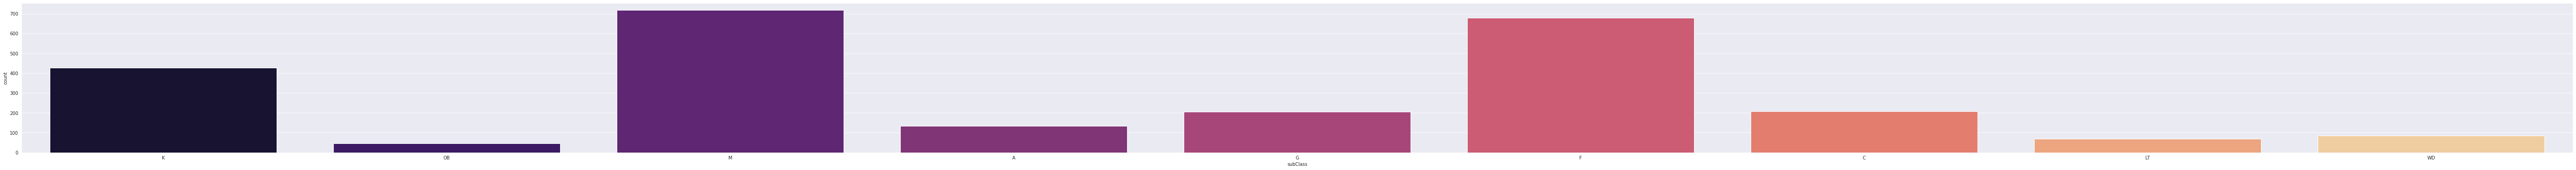

In [168]:
OB = [i for i in sub_class if 'O' in i or 'B' in i]b
M = sub_class[[i for i in range(len(sub_class)) if 'M' in sub_class[i]]]
A = sub_class[[i for i in range(len(sub_class)) if 'A' in sub_class[i]]]
F = sub_class[[i for i in range(len(sub_class)) if 'F' in sub_class[i]]]
K = sub_class[[i for i in range(len(sub_class)) if 'K' in sub_class[i]]]
G = sub_class[[i for i in range(len(sub_class)) if 'G' in sub_class[i]]]
LT = sub_class[[i for i in range(len(sub_class)) if 'L' in sub_class[i] or 'T' in sub_class[i]]]
WD = sub_class[[i for i in range(len(sub_class)) if 'WD' in sub_class[i]]]
C = sub_class[[i for i in range(len(sub_class)) if 'C' in sub_class[i]]]

In [184]:
table = pd.DataFrame([['OB', 'M', 'A', 'F', 'K', 'G', 'LT', 'WD', 'C']], columns=['OB', 'M', 'A', 'F', 'K', 'G', 'LT', 'WD', 'C'])
ssss = set()
print(table)
for i in ['OB', 'M', 'A', 'F', 'K', 'G', 'LT', 'WD', 'C']:
    table[i] = [[]]
    if len(i) > 0:
        for j in i:
            table[i][0] += [k for k in sub_class if j in k and k not in ssss]
            ssss = ssss.union({k for k in sub_class if j in k})
    else:
        table[i][0] += [k for k in sub_class if i in k and k not in ssss]
        ssss = ssss.union({k for k in sub_class if j in k})

   OB  M  A  F  K  G  LT  WD  C
0  OB  M  A  F  K  G  LT  WD  C


In [193]:
for i in table.columns:
    print('**', i, '**', table[i].values[0], '\n')

** OB ** ['STARBURST BROADLINE', 'O', 'O9.5Iae (30614)', 'BROADLINE', 'STARFORMING BROADLINE', 'OB', 'STARFORMING', 'O8e (188001)', 'O8/O9 (167771)', 'AGN BROADLINE', 'B0.5Ibe... (187459)', 'B2.5V (175426)', 'B9.5V+... (37269)', 'B0.5Iae (185859)', 'B5 (338529)', 'B8Ib (208501)', 'B2III (35468)', 'B8IV (171301)', 'B9Vn (177756)', 'B1Ve (212571)', 'B5III (209419)', 'B2IV-V (176819)', 'B3V (29763)', 'B7IVe (209409)', 'B6IIIpe (109387)', 'B9 (105262)', 'STARBURST', 'B2Iaevar (41117)', 'B9', 'B6IV (174959)', 'B9III (15318)', 'B3II (175156)', 'B3Ve (25940)', 'B2Ve (164284)', 'B3Ib/II (51309)', 'B6', 'B0IVe (5394)', 'B2Vne (58343)', 'B5Ib (191243)', 'B8III (220575)', 'B5V (173087)', 'B2.5Ve (187811)', 'B2Vne (202904)'] 

** M ** ['M2Iab: (36389)', 'M2III (169305)', 'M9', 'M2', 'M3III (44478)', 'M4II (175588)', 'M5Iab: (197812)', 'M7', 'M5III (221615)', 'M4', 'M4.5:III (123657)', 'M0III (168720)', 'M5', 'M7IIIevar (177940)', 'M0', 'M0V', 'M1 (204445)', 'M3', 'M1', 'M2V', 'M8IIIe (84748)', 'M6

In [369]:
for i in s.subClass.values:
    print(i)

STARBURST BROADLINE
B0.5Ibe... (187459)
B2.5V (175426)
O
G2
G9IV (100030)
WD
B9.5V+... (37269)
K0IIIa (57669)
B0.5Iae (185859)
M2Iab: (36389)
O9.5Iae (30614)
L1
M2III (169305)
A4p (G_37-26)
A5Ia (17378)
B5 (338529)
B8Ib (208501)
F9
B2III (35468)
G0Va (143761)
K5III (120933)
K5Ve (118100)
M9
M2
M3III (44478)
M4II (175588)
B8IV (171301)
B9Vn (177756)
B1Ve (212571)
B5III (209419)
G8V (101501)
M5Iab: (197812)
A0
AGN
G0Ib (204867)
M7
B2IV-V (176819)
K3Ib... (17506)
L9
A3Iae (223385)
BROADLINE
B3V (29763)
F3/F5V (30743)
G3Ib (58526)
G5/G6IVw (26297)
K4Iab: (34255)
L0
B7IVe (209409)
F0II (25291)
F2V (33256)
G0 (G_101-29)
WDcooler
A4V (97603)
F0V (90277)
L2
nan
B6IIIpe (109387)
Carbon
F6V (16673)
K1III (18322)
STARFORMING BROADLINE
A1V (95418)
sdF3 (140283)
A6IV (28527)
F6III (61064)
G4V (32923)
K1IVa (142091)
M5III (221615)
WDmagnetic
B9 (105262)
F2III (89254)
F6II (61295)
K3Iab: (4817)
F0Ib (36673)
L4
L5.5
WDhotter
G9Ib (221861)
K3
M4
OB
STARBURST
B2Iaevar (41117)
B9
K5 (110281)
M4.5:III (12

In [371]:
for i in s.subClass.values:
    if 'C' in str(i):
        print(i)

Carbon
CarbonWD
Carbon_lines
CV
CalciumWD


In [91]:
err_coll={
    
    3: 'r',
    4: 'darkblue',
    5: 'o'
}

err_name={
    
    3: 'STAR-QSO',
    4: 'STAR-GALAXY',
    5: 'OSO-GALAXY'
}

In [100]:
df['arg_max'] = np.argmax(df.loc[:, [classs[1]+model, classs[2]+model, classs[3]+model]].values, axis=1) + 1

In [109]:
df['err'] = 0
df.loc[df['class'] != df['arg_max'], ['err']]= df.loc[df['class'] != df['arg_max']]['class'] + df.loc[df['class'] != df['arg_max']]['arg_max']

In [ ]:
df['log_flux_05-20'] = np.log10(df['flux_05-20'].values)
df

# Что происходит в звездах по GAIA?

In [111]:
cls = 1
cls_name = 'STAR'
subClass = 'subClass'

In [292]:
df['gaia_star'] = 0
df.loc[((df['gaiaedr3_parallax'] / df['gaiaedr3_parallax_error'])>4.) | (np.abs(df['gaiaedr3_pmra']/df['gaiaedr3_pmra_error'])>4.) | (np.abs(df['gaiaedr3_pmdec']/df['gaiaedr3_pmdec_error'])>4.), ['gaia_star']] = 1


df['gaia_class'] = 0
df.loc[(df['class'] != 1), ['gaia_class']] = df.loc[(df['class'] != 1), ['class']].values
df.loc[(df['gaia_star'] > 0), ['gaia_class']] = 1
df[['class', 'gaia_star', 'gaia_class']]

,class,gaia_star,gaia_class
0,1,1,1
1,1,1,1
2,1,1,1
3,1,1,1
4,1,1,1
...,...,...,...
90336,2,0,2
90337,2,0,2
90338,2,0,2
90339,2,0,2


['K', 'OB', 'M', 'CV', 'A', 'G', 'F', 'LT', 'WD', 'C'] [169, 4, 208, 84, 36, 62, 265, 2, 22, 1]


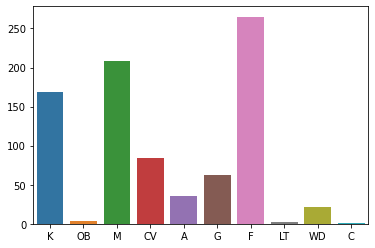

In [112]:
df_cls = df.loc[((df['gaiaedr3_parallax'] / df['gaiaedr3_parallax_error'])>4.) | (np.abs(df['gaiaedr3_pmra']/df['gaiaedr3_pmra_error'])>4.) | (np.abs(df['gaiaedr3_pmdec']/df['gaiaedr3_pmdec_error'])>4.)]#&(np.log10(df['flux_05-20']) > -14.0)]
df_cls = df_cls[(np.log10(df_cls['flux_05-20']) > -14.0)].merge(spec_photo_all[['ra', 'dec', 'subClass_all']], left_on=['ra', 'dec'], right_on=['ra', 'dec'])
df_cls.loc[df_cls['subClass_all'] == 'CV', ['subClass']] = 'CV'
sub_class = ['K', 'OB', 'M', 'CV', 'A', 'G', 'F', 'LT', 'WD', 'C']#[i for i in df_cls[subClass].unique() if i == i]
x0 = sub_class
y0 = [len(df_cls.loc[df_cls[subClass] == i]) for i in x0]
print(x0, y0)

sns.barplot(x=x0, y=y0);

In [63]:
df_cls.loc[df_cls['subClass_all'] == 'CV', ['subClass']] = 'CV'

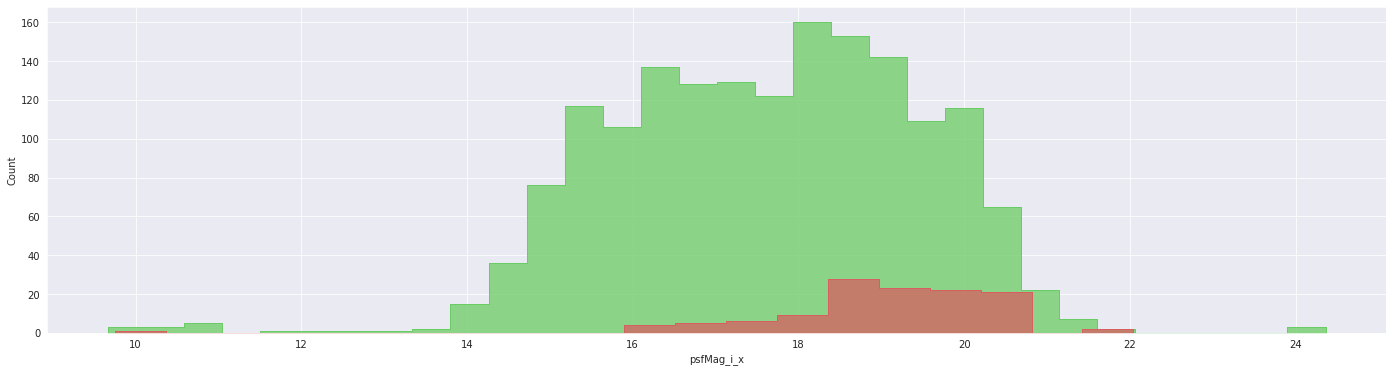

In [243]:
fig, (ax1) = plt.subplots(ncols = 1, figsize = (24, 6))
sns.histplot(df_cls['psfMag_i_x'], ax=ax1, color = 'g', element="step")
sns.histplot(df_cls.loc[df_cls[cls_name+model] < 0.5]['psfMag_i_x'], ax=ax1, color = 'r', element="step")

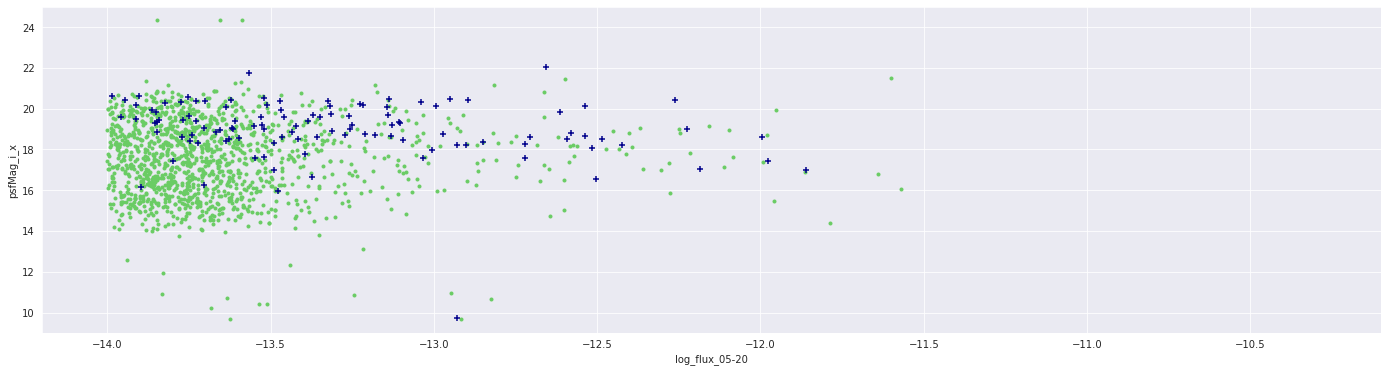

In [314]:
fig, (ax1) = plt.subplots(ncols = 1, figsize = (24, 6))
p = df_cls.loc[(df_cls[cls_name+model] > 0.5)]
x = 'log_flux_05-20'
y = 'psfMag_i_x'
plt.xlabel(x)
plt.ylabel(y)
plt.xlim([-14.2, -10.1])
plt.ylim([9, 25])
#plt.grid()
ax1.scatter(np.log10(p['flux_05-20']),p[y], c = 'g', marker = '.')
p = df_cls.loc[(df_cls[cls_name+model] < 0.5)]
ax1.scatter(np.log10(p['flux_05-20']),p[y], c = 'darkblue', marker = '+')

In [77]:
sub_class

['K', 'OB', 'M', 'CV', 'A', 'G', 'F', 'LT', 'WD', 'C']

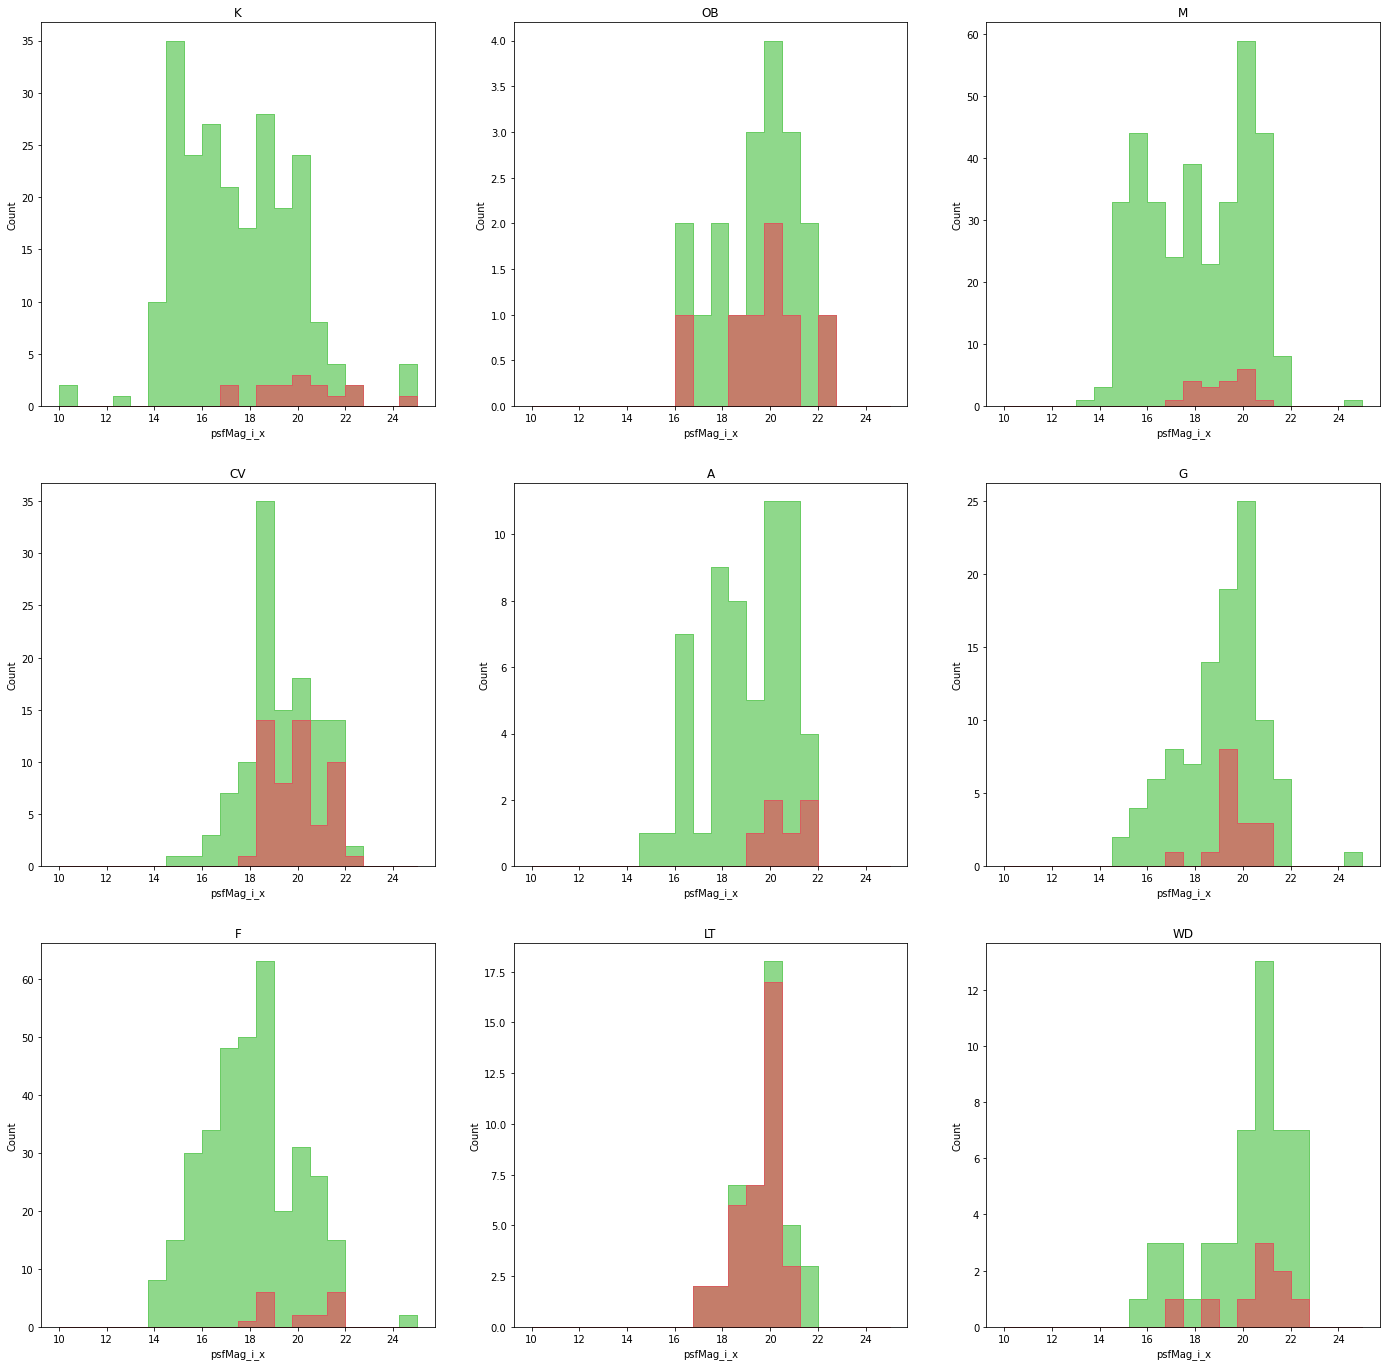

In [87]:
fig, ax = plt.subplots(nrows = 3, ncols=3, figsize = (24, 24))

for en, i in enumerate(sub_class[:-1]):
    j = [en//3, en%3]
    ax[j[0]][j[1]].set_title(i)
    sns.histplot(df_cls.loc[(df_cls[subClass] == i)]['psfMag_i_x'], ax=ax[j[0]][j[1]], color = 'g', element="step", binrange=(10, 25), bins = 20)
    sns.histplot(df_cls.loc[(df_cls[subClass] == i)&(df_cls[cls_name+model] < 0.5)]['psfMag_i_x'], ax=ax[j[0]][j[1]], color = 'r', element="step", binrange=(10, 25),  bins = 20)

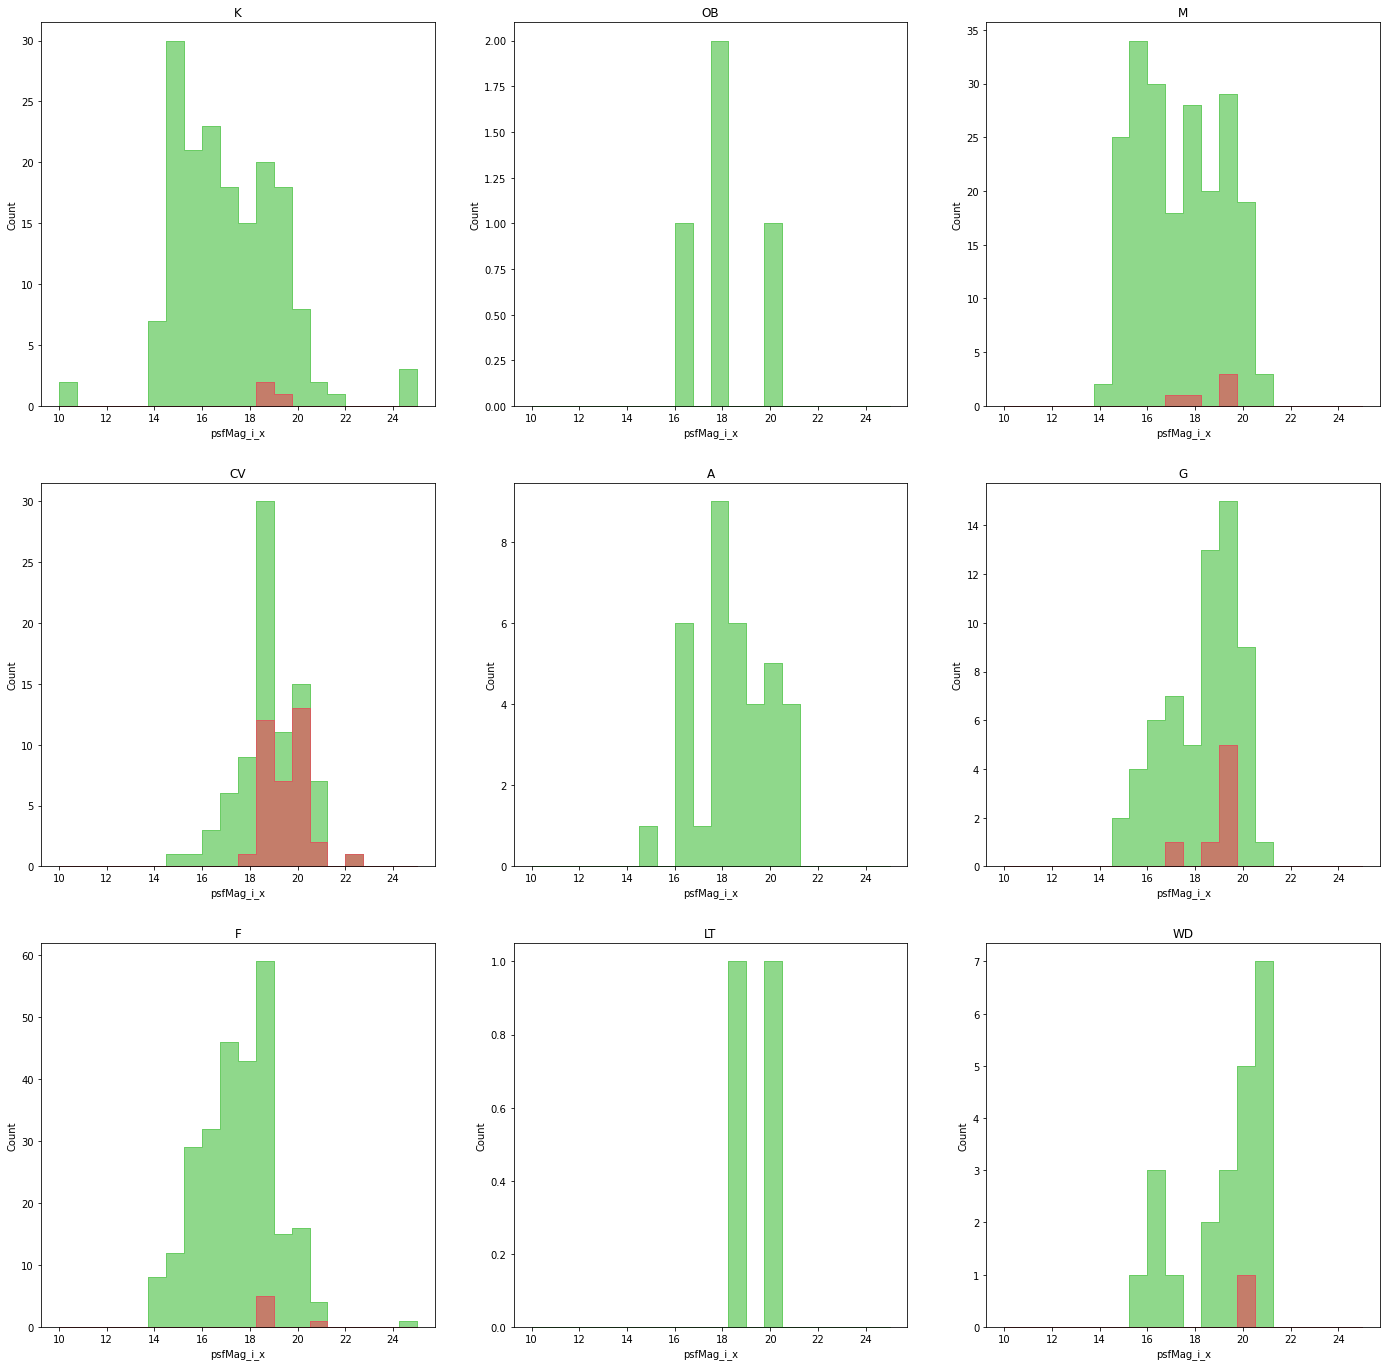

In [113]:
fig, ax = plt.subplots(nrows = 3, ncols=3, figsize = (24, 24))

for en, i in enumerate(sub_class[:-1]):
    j = [en//3, en%3]
    ax[j[0]][j[1]].set_title(i)
    sns.histplot(df_cls.loc[(df_cls[subClass] == i)]['psfMag_i_x'], ax=ax[j[0]][j[1]], color = 'g', element="step", binrange=(10, 25), bins = 20)
    sns.histplot(df_cls.loc[(df_cls[subClass] == i)&(df_cls[cls_name+model] < 0.5)]['psfMag_i_x'], ax=ax[j[0]][j[1]], color = 'r', element="step", binrange=(10, 25), bins = 20)

In [247]:
df_cls.shape

(1662, 134)

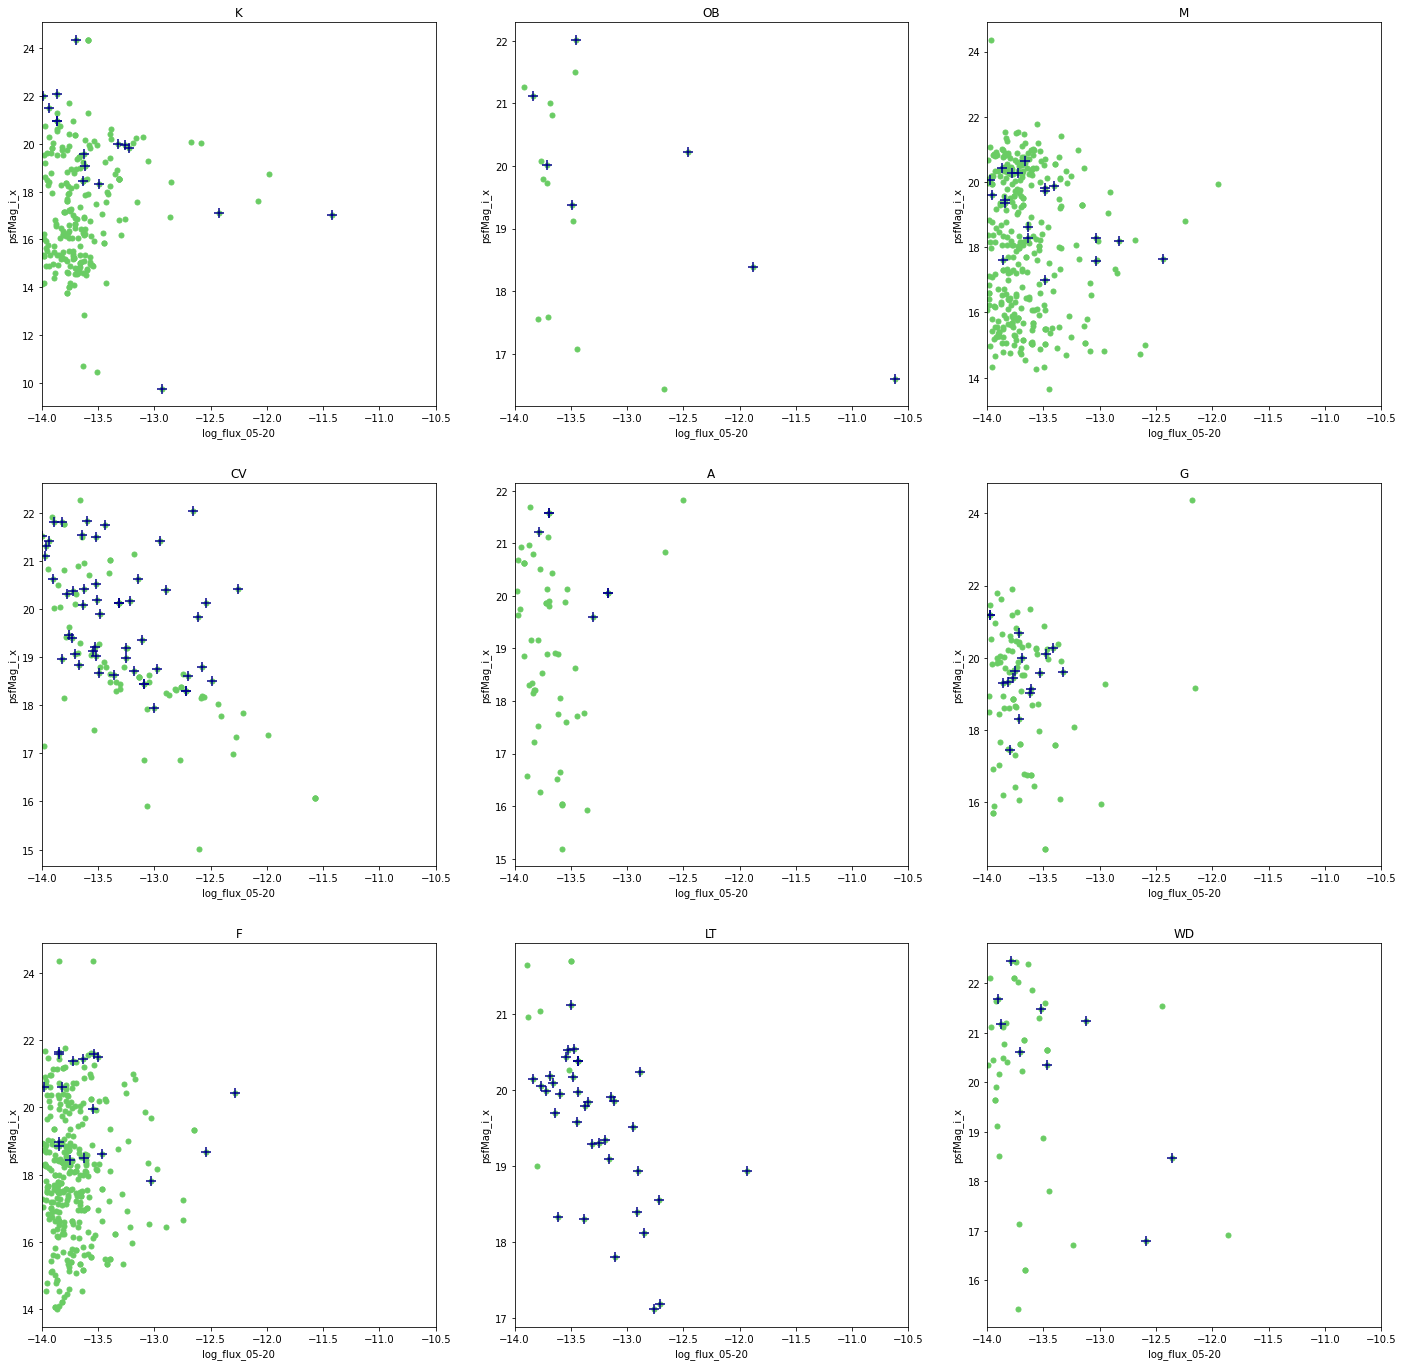

In [75]:
fig, ax = plt.subplots(nrows = 3, ncols=3, figsize = (24, 24))
x = 'zoo_best-x1_z_max'#'log_flux_05-20'
y = 'psfMag_i_x'
for en, i in enumerate(sub_class[:-1]):
    j = [en//3, en%3]
    ax[j[0]][j[1]].set_title(i)
    ax[j[0]][j[1]].set_xlabel(x)
    ax[j[0]][j[1]].set_ylabel(y)
    ax[j[0]][j[1]].set_xlim([-14.0, -10.5])
    p = df_cls.loc[(df_cls[subClass] == i)]
    ax[j[0]][j[1]].scatter(np.log10(p['flux_05-20']), p[y], c = 'g', marker = '.', s=100)
    ax[j[0]][j[1]].scatter(np.log10(p.loc[p[cls_name+model] < 0.5]['flux_05-20']), p.loc[p[cls_name+model] < 0.5][y], c = 'darkblue', marker = '+', s=100)


KeyError: 'log_flux_05-20'

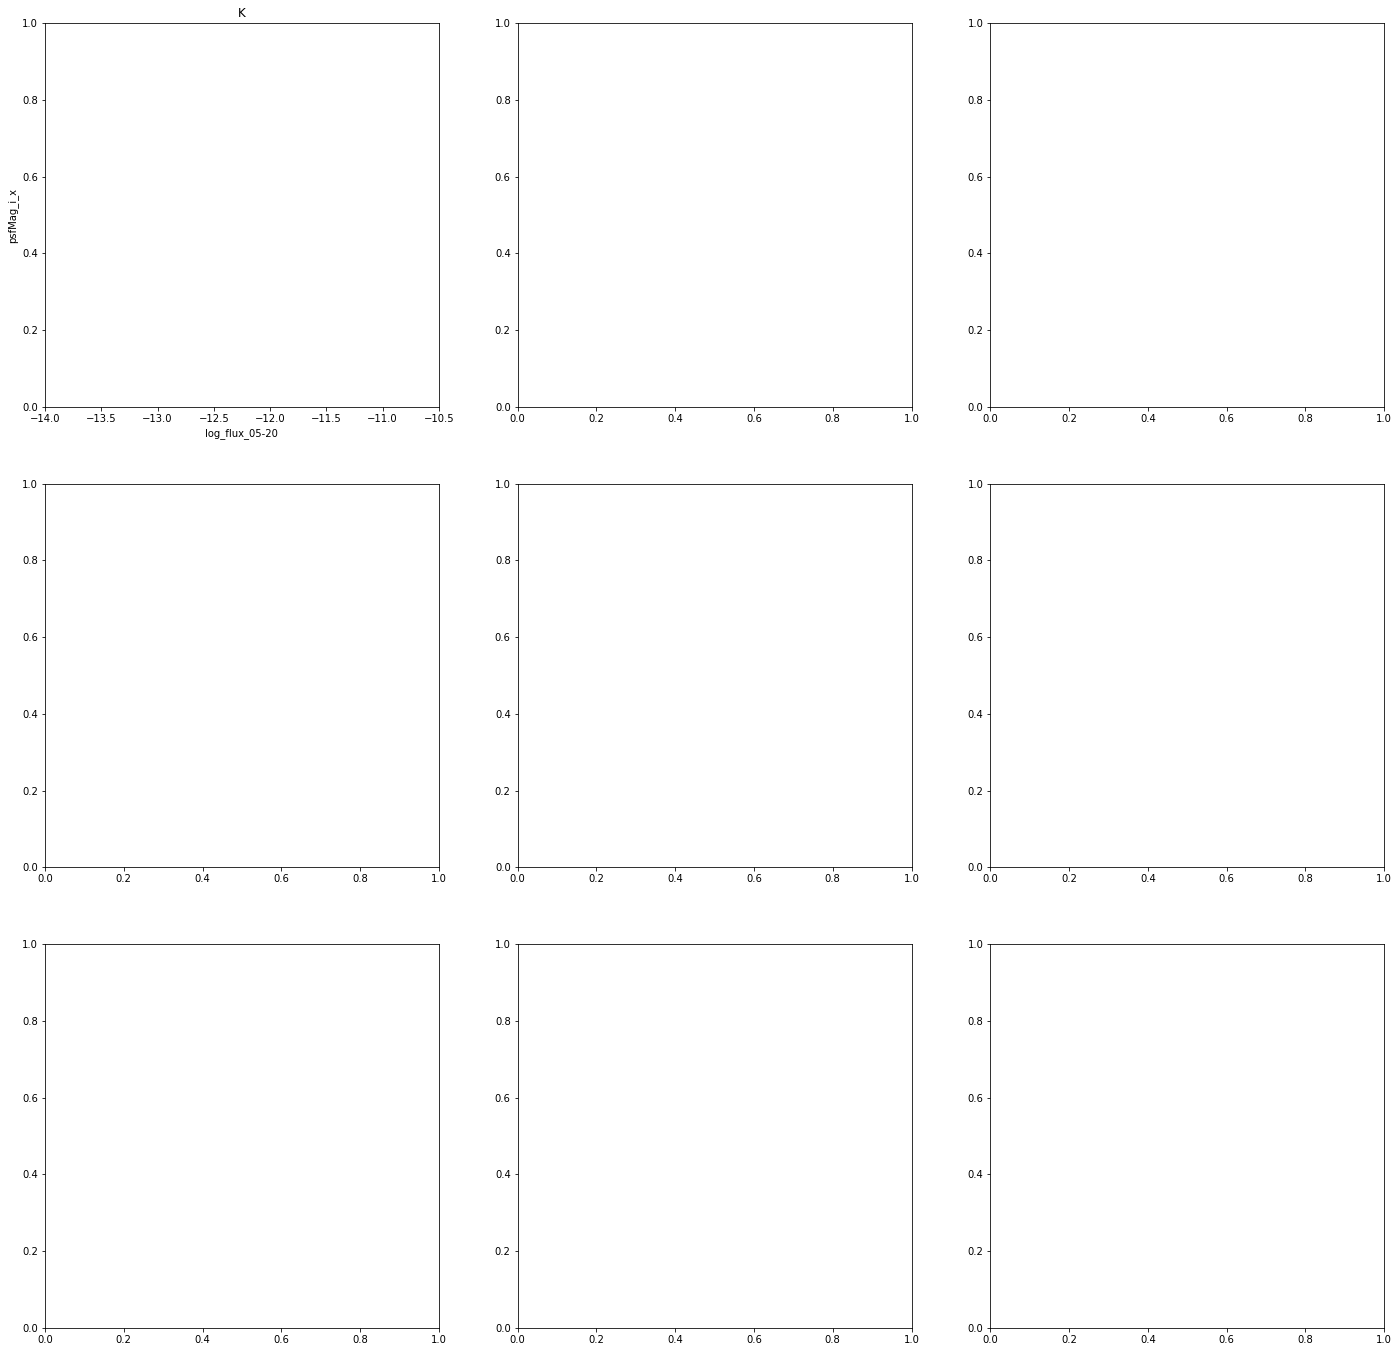

In [115]:
fig, ax = plt.subplots(nrows = 3, ncols=3, figsize = (24, 24))
x = 'log_flux_05-20' #'zoo_best-x1_z_max'#
y = 'psfMag_i_x'
for en, i in enumerate(sub_class[:-1]):
    j = [en//3, en%3]
    ax[j[0]][j[1]].set_title(i)
    ax[j[0]][j[1]].set_xlabel(x)
    ax[j[0]][j[1]].set_ylabel(y)
    ax[j[0]][j[1]].set_xlim([-14.0, -10.5])
    p = df_cls.loc[(df_cls[subClass] == i)]
    ax[j[0]][j[1]].scatter(p[x], p[y], c = 'g', marker = '.', s=100)
    er = 3
    ax[j[0]][j[1]].scatter(p.loc[p['err'] == er][x], p.loc[p['err'] == er][y], c = err_coll[er], marker = '+', s=100)
    er = 4
    ax[j[0]][j[1]].scatter(p.loc[p['err'] == er][x], p.loc[p['err'] == er][y], c = err_coll[er], marker = '*', s=100)


# Что происходит в квазарах?

In [315]:
cls = 2
cls_name = 'QSO'
subClass = 'subClass_zspec'

In [144]:
df.loc[df['class'] == 2][['z', 'class']]

,z,class
2687,NaN,2
2800,NaN,2
2801,NaN,2
2802,NaN,2
2803,NaN,2
...,...,...
90336,NaN,2
90337,NaN,2
90338,NaN,2
90339,NaN,2


Мы потеряли спектр, поэтому выходим на поиски

Все, я нашла - не беспокоимся

Добавим подкласс для QSO в сами данные, чтобы было проще к ним обращаться

In [146]:
df

,nrow,ra,dec,sdssdr16_r_cmodel,sdssdr16_u_psf,sdssdr16_g_psf,sdssdr16_r_psf,sdssdr16_i_psf,sdssdr16_z_psf,sdssdr16_u_cmodel,...,__nrow__,__kfold_idx__,__idx__,zspec_x,zspec_conf_x,subClass_zspec,zspec_y,zspec_conf_y,iM,psfMag_i_y
0,479930,202.282430,54.634649,14.284850,15.425760,13.446979,12.627240,12.330905,12.189954,15.378677,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,369864,39.590202,25.929937,14.326030,16.863442,15.115750,14.334579,14.009822,13.850344,16.856726,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,300688,9.479298,26.013941,14.439129,17.160359,15.317354,14.500675,14.171034,13.994981,17.174830,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,406634,123.857630,84.116610,14.449013,16.818112,15.170976,14.467044,14.189930,14.021493,16.823102,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,884497,46.596422,-0.998363,14.468092,17.233317,15.308717,14.480649,14.098463,13.865375,17.216415,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90336,379158,176.740791,40.619063,20.968640,23.128555,23.847986,20.960905,19.388747,19.257523,20.048764,...,294782.0,1.0,585759.0,4.9800,-999.0,"[3.0, 5.0]",4.9800,-999.0,19.40954,19.41988
90337,405,245.813667,47.099972,20.864200,23.196904,24.915909,20.873857,19.518247,19.236609,21.138404,...,294833.0,1.0,585866.0,5.1300,NaN,"[5.0, inf]",5.1300,NaN,NaN,19.53045
90338,382,22.863917,-3.350053,20.100102,23.504853,24.186759,20.165938,18.466278,18.018938,23.073629,...,294856.0,1.0,585916.0,5.1800,NaN,"[5.0, inf]",5.1800,NaN,NaN,18.52333
90339,309,136.628125,69.508556,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,294883.0,1.0,585965.0,5.4700,NaN,"[5.0, inf]",5.4700,NaN,NaN,NaN


In [147]:
zspec_bins = [-np.inf, 0.2, 0.5, 1.0, 2.0, 3.0, 5.0, np.inf]
for i in range(len(zspec_bins) - 1):
    name = str([zspec_bins[i], zspec_bins[i+1]])
    df.loc[(df['class'] == cls)&(df['zspec_y'] > zspec_bins[i])&(df['zspec_y'] < zspec_bins[i+1]), subClass] = name

In [70]:
sns.set_color_codes("muted")

['[-inf, 0.2]', '[0.2, 0.5]', '[0.5, 1.0]', '[1.0, 2.0]', '[2.0, 3.0]', '[3.0, 5.0]', '[5.0, inf]'] [132, 4005, 25675, 37885, 12282, 1369, 6]


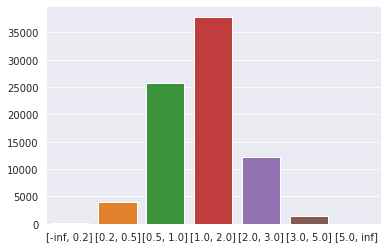

In [316]:
df_cls = df.loc[(df['class'] == cls)&(np.log10(df['flux_05-20']) > -14.0)]#&(np.log10(df['flux_05-20']) > -14.0)]
sub_class = [i for i in df_cls[subClass].unique() if i == i]
x0 = sub_class
y0 = [len(df_cls.loc[df_cls[subClass] == i]) for i in x0]
print(x0, y0)

sns.barplot(x=x0, y=y0);

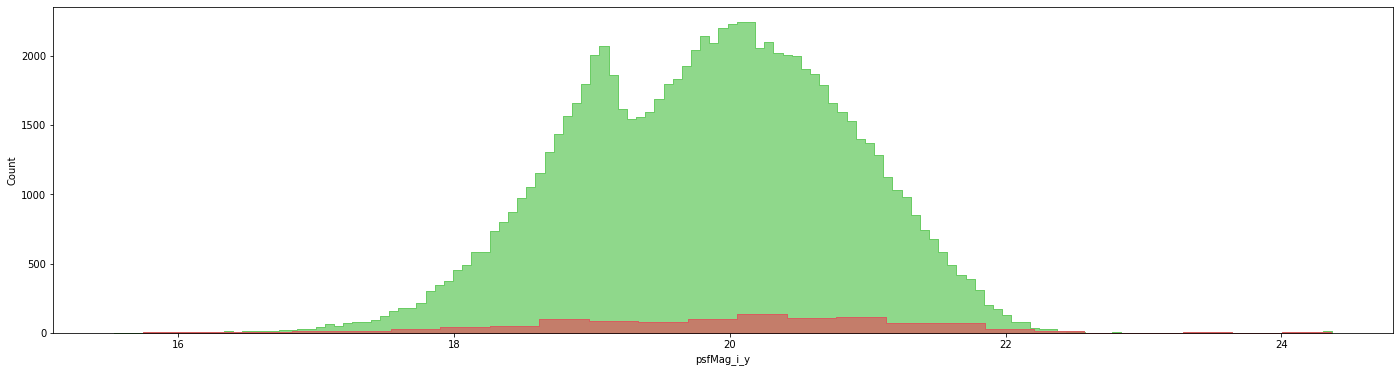

In [150]:
fig, (ax1) = plt.subplots(ncols = 1, figsize = (24, 6))
sns.histplot(df_cls['psfMag_i_y'], ax=ax1, color = 'g', element="step")
sns.histplot(df_cls.loc[df_cls[cls_name+model] < 0.5]['psfMag_i_y'], ax=ax1, color = 'r', element="step")

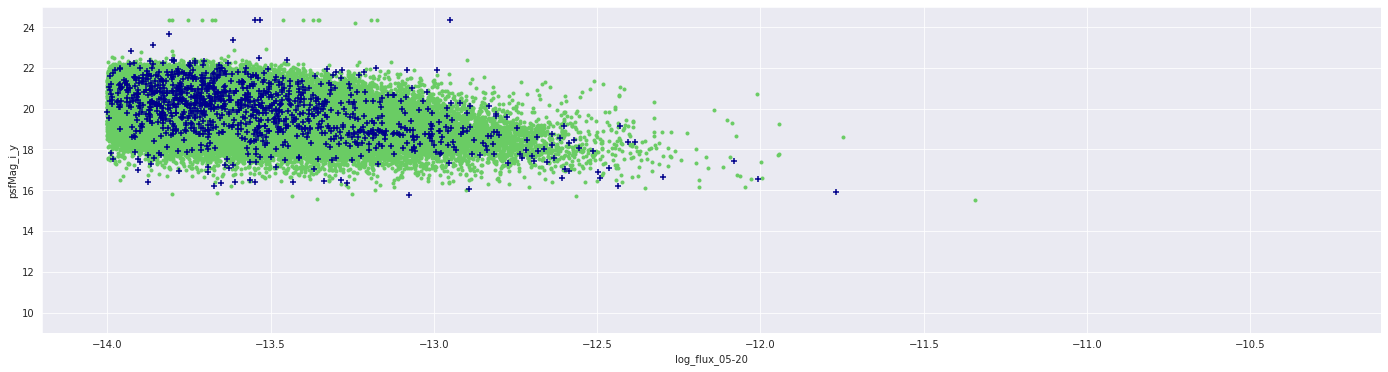

In [317]:
fig, (ax1) = plt.subplots(ncols = 1, figsize = (24, 6))
p = df_cls.loc[(df_cls[cls_name+model] > 0.5)]
x = 'zoo_best-x1_z_max'#'log_flux_05-20'
y = 'psfMag_i_y'
plt.xlabel(x)
plt.ylabel(y)
plt.xlim([-14.2, -10.1])
plt.ylim([9, 25])
#plt.grid()
ax1.scatter(np.log10(p['flux_05-20']),p[y], c = 'g', marker = '.')
p = df_cls.loc[(df_cls[cls_name+model] < 0.5)]
ax1.scatter(np.log10(p['flux_05-20']),p[y], c = 'darkblue', marker = '+')

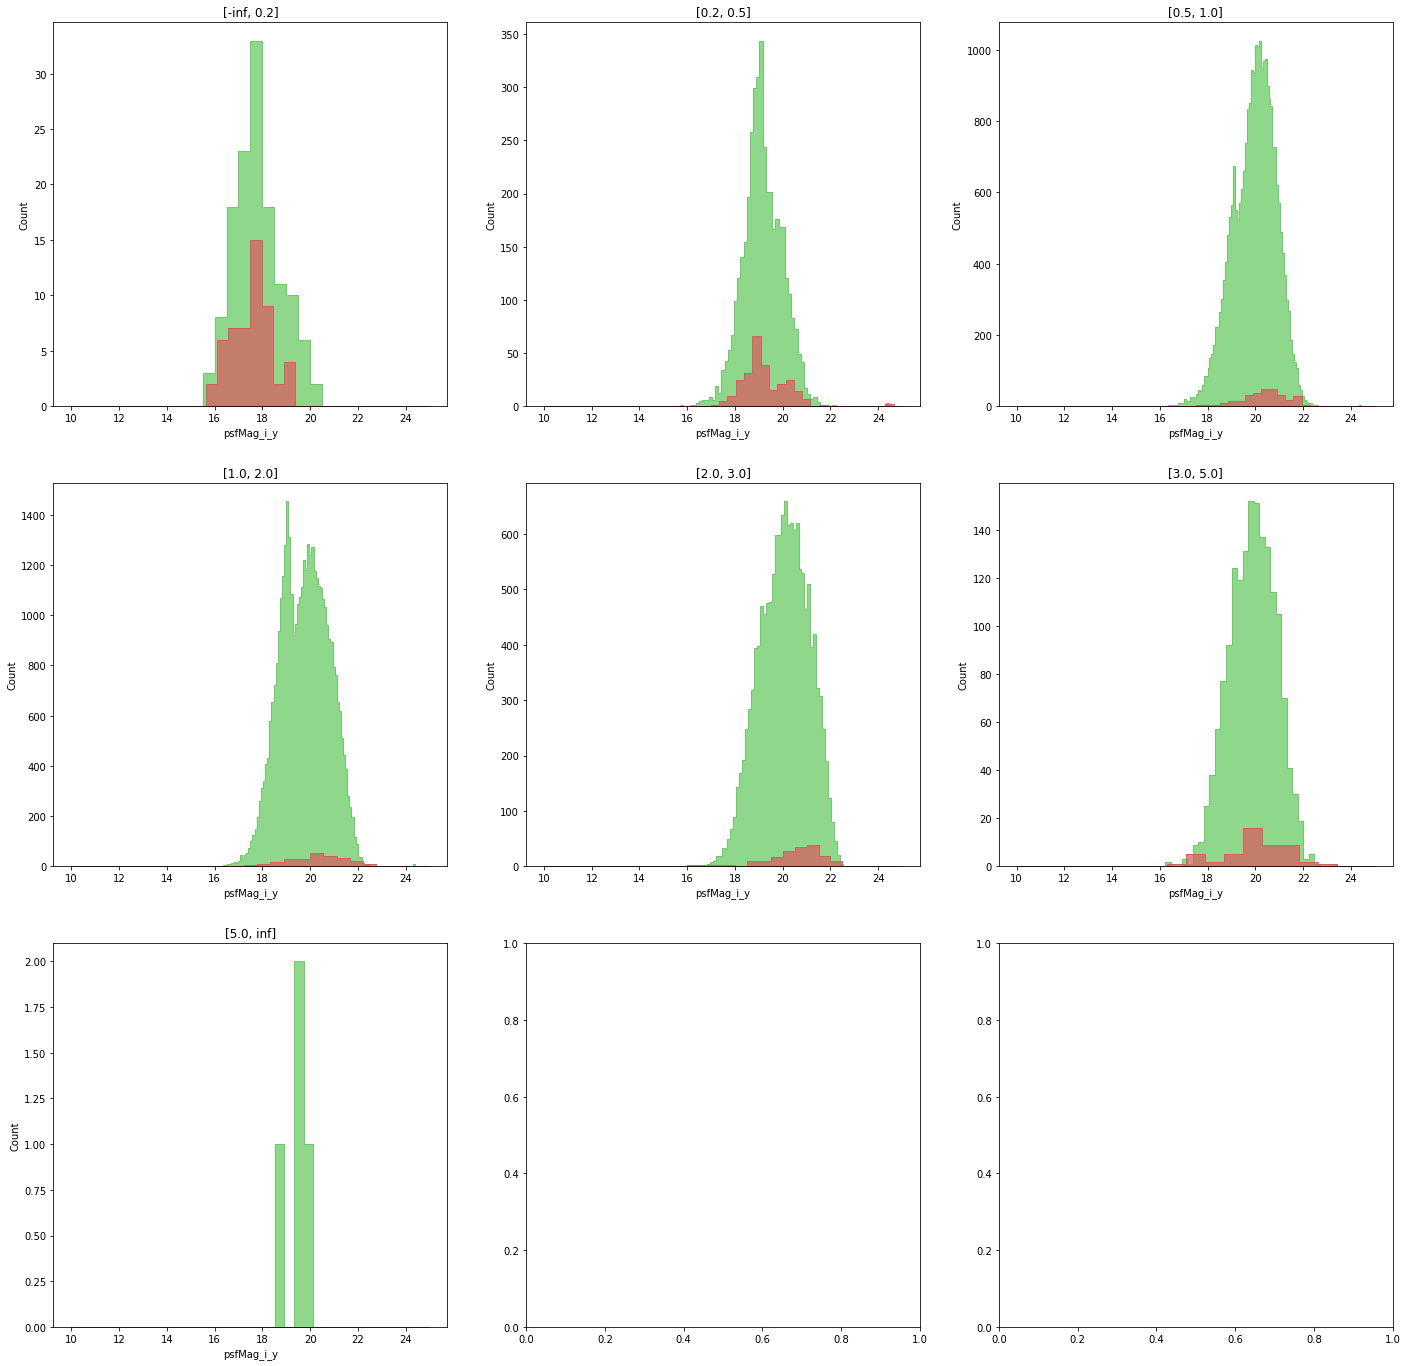

In [113]:
fig, ax = plt.subplots(nrows = 3, ncols=3, figsize = (24, 24))

for en, i in enumerate(sub_class):
    j = [en//3, en%3]
    ax[j[0]][j[1]].set_title(i)
    sns.histplot(df_cls.loc[(df_cls[subClass] == i)]['psfMag_i_y'], ax=ax[j[0]][j[1]], color = 'g', element="step", binrange=(10, 25), bins = 50)
    sns.histplot(df_cls.loc[(df_cls[subClass] == i)&(df_cls[cls_name+model] < 0.5)]['psfMag_i_y'], ax=ax[j[0]][j[1]], color = 'r', element="step", binrange=(10, 25), bins = 50)

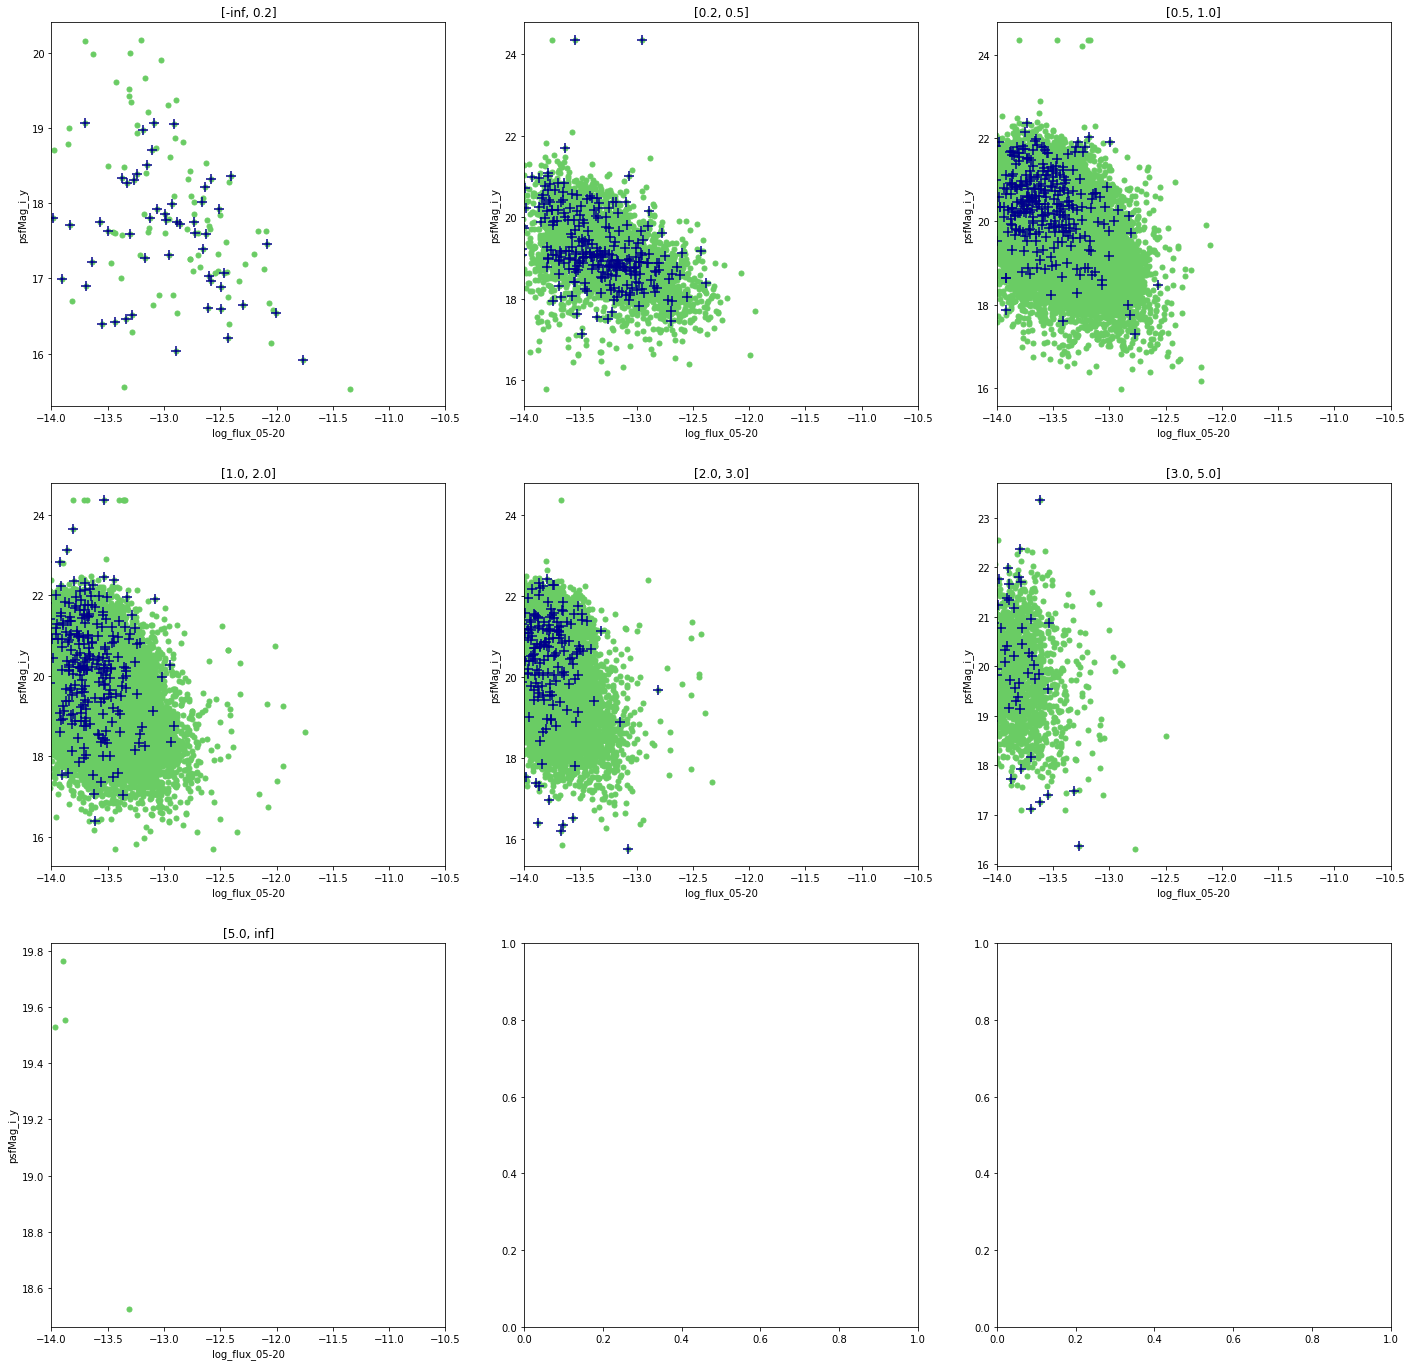

In [115]:
fig, ax = plt.subplots(nrows = 3, ncols=3, figsize = (24, 24))
x = 'zoo_best-x1_z_max'#'log_flux_05-20'
y = 'psfMag_i_y'
for en, i in enumerate(sub_class):
    j = [en//3, en%3]
    ax[j[0]][j[1]].set_title(i)
    ax[j[0]][j[1]].set_xlabel(x)
    ax[j[0]][j[1]].set_ylabel(y)
    ax[j[0]][j[1]].set_xlim([-14.0, -10.5])
    p = df_cls.loc[(df_cls[subClass] == i)]
    ax[j[0]][j[1]].scatter(np.log10(p['flux_05-20']), p[y], c = 'g', marker = '.', s=100)
    ax[j[0]][j[1]].scatter(np.log10(p.loc[p[cls_name+model] < 0.5]['flux_05-20']), p.loc[p[cls_name+model] < 0.5][y], c = 'darkblue', marker = '+', s=100)


# Посмотрим на галактики?

In [86]:
df

,nrow,ra,dec,sdssdr16_r_cmodel,sdssdr16_u_psf,sdssdr16_g_psf,sdssdr16_r_psf,sdssdr16_i_psf,sdssdr16_z_psf,sdssdr16_u_cmodel,...,__nrow__,__kfold_idx__,__idx__,zspec_x,zspec_conf_x,subClass_zspec,zspec_y,zspec_conf_y,iM,psfMag_i_y
0,479930,202.282430,54.634649,14.284850,15.425760,13.446979,12.627240,12.330905,12.189954,15.378677,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,369864,39.590202,25.929937,14.326030,16.863442,15.115750,14.334579,14.009822,13.850344,16.856726,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,300688,9.479298,26.013941,14.439129,17.160359,15.317354,14.500675,14.171034,13.994981,17.174830,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,406634,123.857630,84.116610,14.449013,16.818112,15.170976,14.467044,14.189930,14.021493,16.823102,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,884497,46.596422,-0.998363,14.468092,17.233317,15.308717,14.480649,14.098463,13.865375,17.216415,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90336,379158,176.740791,40.619063,20.968640,23.128555,23.847986,20.960905,19.388747,19.257523,20.048764,...,294782.0,1.0,585759.0,4.9800,-999.0,"[3.0, 5.0]",4.9800,-999.0,19.40954,19.41988
90337,405,245.813667,47.099972,20.864200,23.196904,24.915909,20.873857,19.518247,19.236609,21.138404,...,294833.0,1.0,585866.0,5.1300,NaN,"[5.0, inf]",5.1300,NaN,NaN,19.53045
90338,382,22.863917,-3.350053,20.100102,23.504853,24.186759,20.165938,18.466278,18.018938,23.073629,...,294856.0,1.0,585916.0,5.1800,NaN,"[5.0, inf]",5.1800,NaN,NaN,18.52333
90339,309,136.628125,69.508556,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,294883.0,1.0,585965.0,5.4700,NaN,"[5.0, inf]",5.4700,NaN,NaN,NaN


In [318]:
cls = 3
cls_name = 'GALAXY'
subClass = 'subClass_zspec'

In [129]:
zspec_bins = [-np.inf, 0.2, 0.5, 1.0, 2.0, 3.0, 5.0, np.inf]
for i in range(len(zspec_bins) - 1):
    name = str([zspec_bins[i], zspec_bins[i+1]])
    df.loc[(df['class'] == cls)&(df['zspec_y'] > zspec_bins[i])&(df['zspec_y'] < zspec_bins[i+1]), subClass] = name

In [211]:
sns.set_color_codes("muted")

['[-inf, 0.2]', '[0.2, 0.5]', '[0.5, 1.0]', '[1.0, 2.0]'] [711, 720, 279, 4]


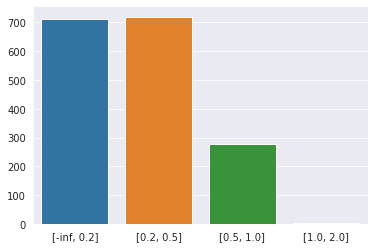

In [319]:
df_cls = df.loc[(df['class'] == cls)&(np.log10(df['flux_05-20']) > -14.0)]#&(np.log10(df['flux_05-20']) > -14.0)]
sub_class = [i for i in df_cls[subClass].unique() if i == i]
x0 = sub_class
y0 = [len(df_cls.loc[df_cls[subClass] == i]) for i in x0]
print(x0, y0)

sns.barplot(x=x0, y=y0);

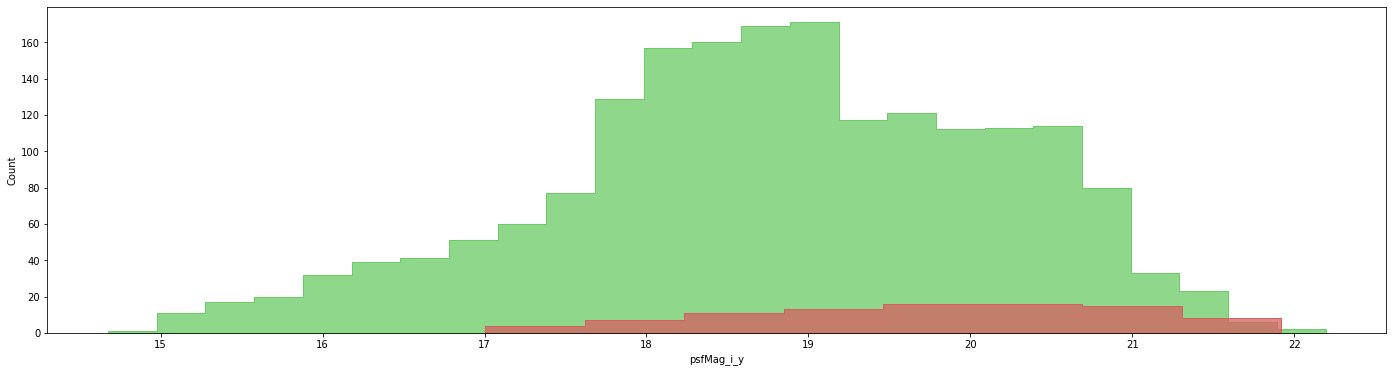

In [132]:
fig, (ax1) = plt.subplots(ncols = 1, figsize = (24, 6))
sns.histplot(df_cls['psfMag_i_y'], ax=ax1, color = 'g', element="step")
sns.histplot(df_cls.loc[df_cls[cls_name+model] < 0.5]['psfMag_i_y'], ax=ax1, color = 'r', element="step")

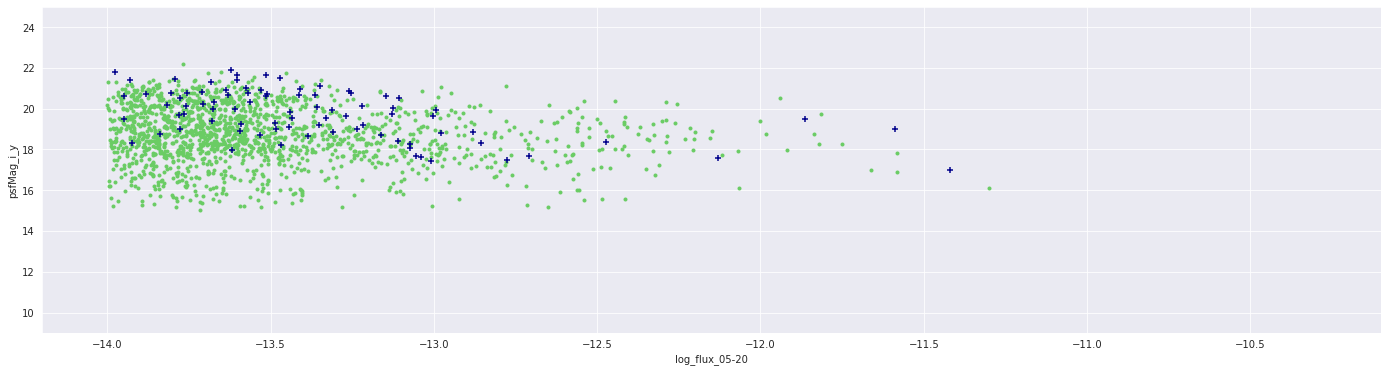

In [320]:
fig, (ax1) = plt.subplots(ncols = 1, figsize = (24, 6))
p = df_cls.loc[(df_cls[cls_name+model] > 0.5)]
x = 'log_flux_05-20'
y = 'psfMag_i_y'
plt.xlabel(x)
plt.ylabel(y)
plt.xlim([-14.2, -10.1])
plt.ylim([9, 25])
#plt.grid()
ax1.scatter(np.log10(p['flux_05-20']),p[y], c = 'g', marker = '.')
p = df_cls.loc[(df_cls[cls_name+model] < 0.5)]
ax1.scatter(np.log10(p['flux_05-20']),p[y], c = 'darkblue', marker = '+')

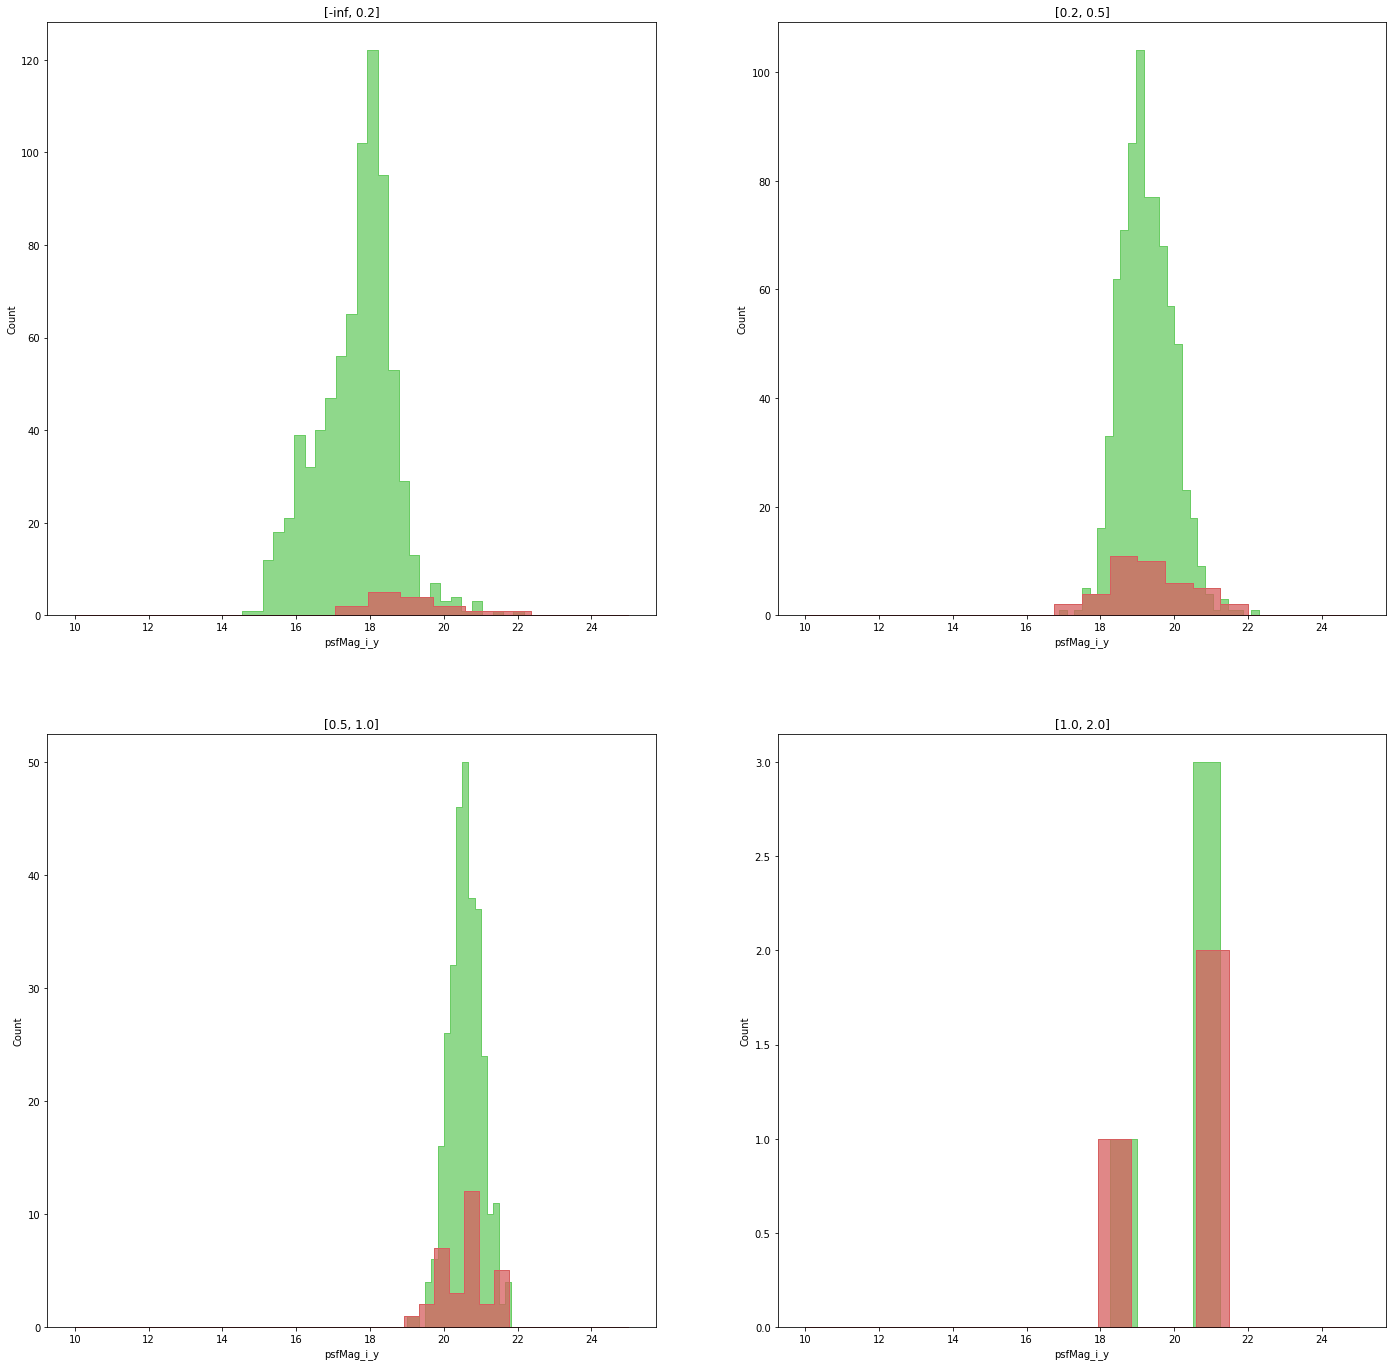

In [104]:
fig, ax = plt.subplots(nrows = 2, ncols=2, figsize = (24, 24))

for en, i in enumerate(sub_class):
    j = [en//2, en%2]
    ax[j[0]][j[1]].set_title(i)
    sns.histplot(df_cls.loc[(df_cls[subClass] == i)]['psfMag_i_y'], ax=ax[j[0]][j[1]], color = 'g', element="step", binrange=(10, 25), bins = 20)
    sns.histplot(df_cls.loc[(df_cls[subClass] == i)&(df_cls[cls_name+model] < 0.5)]['psfMag_i_y'], ax=ax[j[0]][j[1]], color = 'r', element="step", binrange=(10, 25), bins = 20)

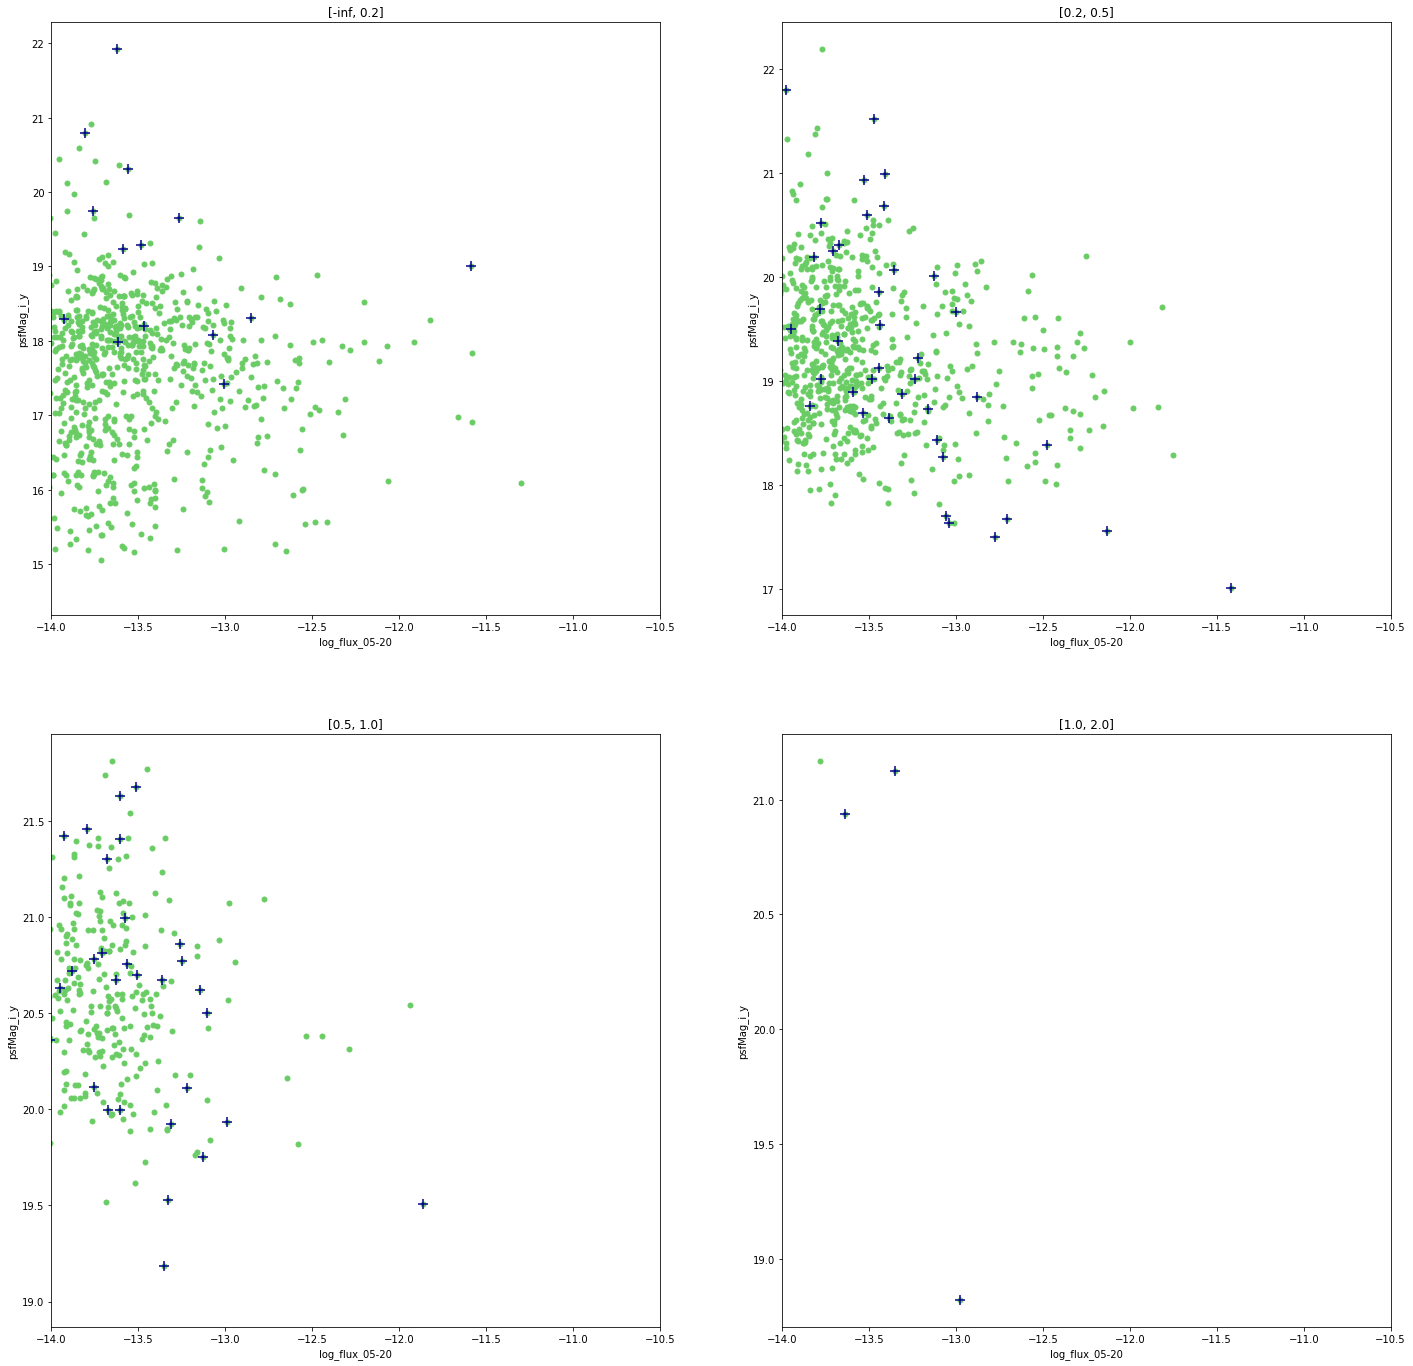

In [106]:
fig, ax = plt.subplots(nrows = 2, ncols=2, figsize = (24, 24))
x = 'zoo_best-x1_z_max'#'log_flux_05-20'
y = 'psfMag_i_y'
for en, i in enumerate(sub_class):
    j = [en//2, en%2]
    ax[j[0]][j[1]].set_title(i)
    ax[j[0]][j[1]].set_xlabel(x)
    ax[j[0]][j[1]].set_ylabel(y)
    ax[j[0]][j[1]].set_xlim([-14.0, -10.5])
    p = df_cls.loc[(df_cls[subClass] == i)]
    ax[j[0]][j[1]].scatter(np.log10(p['flux_05-20']), p[y], c = 'g', marker = '.', s=100)
    ax[j[0]][j[1]].scatter(np.log10(p.loc[p[cls_name+model] < 0.5]['flux_05-20']), p.loc[p[cls_name+model] < 0.5][y], c = 'darkblue', marker = '+', s=100)
